# The Infinite "Unsquare" Potential

##### Date: 2025 - 03 -14



# Introduction

This notebook explores the numerical solution of the one-dimensional time-independent Schrödinger equation for a particle confined in an infinite potential well. This problem is fundamental to quantum mechanics and the understanding of quantum confinement, which refers to the spatial confinement of electron-hole pairs in one or multiple dimensions within a material (Ramalingam, 2020) . Numerical techniques such as the Runge-Kutta and secant method will be used to solve differential equations to find energy eigenvalues that satisfy the boundary conditions, which is useful to solve systems where analytical solutions do not exist.

The ground state energy and wavefunction will be identified for an electron in a quantum dot, and then be compared to existing analytical solutions. Once validated, higher energy states will be used to study more complex potentials such as the harmonic potential and finite square well, enclosed in an infinite square well.


# 	Theory


The one-dimensional time-independent Schrödinger equation (TISE) is given by [1]:

$$
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x) \ \qquad   \text{(1)}
$$
 
- $\hbar = \frac{h}{2\pi}$  , the reduced Planck's constant (Joules per second)
- $\psi$ = The wavefunction to the TISE
- $V(x)$= The potential of the system (Joules per coulomb)
- $E$    = Energy eigenvalue of the system (Joules)

### Particle in an Infinite Square Well with Width 2a:

For a particle in this system, the potential $V(x)$ will be one of two values as shown below [2]:

$$ V_x = \begin{cases} 0 & \text{if } -a \leq x \leq +a, \\ 
\infty  & \text{if } |x| > a, \end{cases} \qquad \text{(2)}
$$

These results show that the probability of finding the particle outside the well is zero. Additionally, the wavefunction,$\psi (x)$ must be continuous everywhere. This introduces a boundary condition of $\psi (\pm a) = 0$ , where a is defined as the half-width of the well.

### Schrödinger Equation as a Linear Eigenvalue Problem:

The Schrödinger equation is a second-order differential equation that can be rewritten as a system of first-order differential equations, which yields:

$$
\frac{d \psi}{dx } = \phi \qquad    \text{(3)} \\ 
\frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x) \qquad \text{(4)}
$$

This is a linear equation, meaning if $\psi(x)$ is a solution, then any multiple of $\psi(x)$ is also a solution (Schroeder, 2025). However, not all multiples of the wavefunction will satisfy the boundary condition of $\psi(x = \pm a) = 0$

More specifically, the Schrödinger equation is an $\textbf{eigenvalue}$ equation, meaning it only has solutions for specific values of $E$. These solutions are known as $\textbf{eigenvalues}$ and the corresponding wavefunctions are the $\textbf{eigenfunctions}$.


### Runge-Kutta Method to Determine $E_n$, the Ground State Energy in a Quantum Dot with Side Length d:

The value of $\psi(x)$ can be estimated using the fourth-order $\textbf{Runge-Kutta}$ method (RK4) - a numerical technique that estimates the solution of differential equations at discrete time steps. The following equations are: 

$$
k_1 = h f(x,t), \\
k_2 = h f(x+\frac{1}{2}k_1, t+\frac{1}{2}h), \\
k_3 = h f(x+\frac{1}{2}k_2, t+\frac{1}{2}h), \\
k_4 = h f(x+k_3, t+h), \\
x(t+h) = x(t) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4). \qquad \text{(5)}
$$

In this case, the $\textbf{energy eigenvalue}$ will be estimated by iterating the $\textbf{Secant Method}$, which ensures that the boundary condition of $\psi(\pm a) = 0$ is respected.

To start, two initial energy guesses, $E_1$ and $E_2$, are chosen -  ideally close to the ground state energy. These guesses are used in the Secant method, illustrated by (Dash, 2020): 

$$ 
x_3 = x_2 - f(x_2) \frac{x_2 - x_1}{f(x_2) - f(x_1)}, \qquad \text{(6)}
$$


The energy eigenvalue calculated from this method can then be compared to the analytical solution for the $\textbf{ground state energy}$ (at n=1), given by:

$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (d)^2} \qquad \text{(7)}
$$

Additionally, the eigenvalue is inserted into the RK4 method to estimate a value for the eigenfunction, $\psi(x) $.


### Finding the Ground State Function:
The wavefunction, $\psi(x)$ must be normalised to satisfy the condition (Rae, 2002):

$$
\int_{-\infty}^{\infty} | \psi(x) |^2 {\rm d} x = 1  \qquad \text{(8)}
$$

The integral on the left-hand side of (7) from limits a and b, is calculated using the trapezoidal rule, which yields:

$$
I(a,b) = h \left[ \frac{1}{2}f(a) + \frac{1}{2}f(b) +
      \sum_{k=1}^{n-1}f(x + kh) \right] \qquad \text{(9)}
$$

Furthermore, dividing the wavefunction by the square root of the value found from (8) achieves a normalised wavefunction. After normalisation, these results can be compared to the analytical solutions for the normalised ground state wavefunctions in an infinite square well: 

$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
    n \ \mathrm{odd}  \qquad \text{(10)}
$$
    
$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad
    n \ \mathrm{even}  \qquad \text{(11)}
$$


### Harmonic Potential:

Embedding a harmonic potential within the square well increases the complexity of the system, and therefore has a lower likelihood to have simple analytical solutions. Therefore, numerical techniques such as RK4 and Secant method must be implemented to solve for it. In this case, the potential takes the form:

$$
V(x) = V_0 \frac{x^2}{a^2}  \qquad \text{(12)}
$$

### Finite Square Well:
Similar to the harmonic potential, a finite square well can be enclosed within the infinite square well. The potential in this case takes the form:

$$
V_x = \begin{cases} 0 & \text{if } -a/2 \leq x \leq +a/2, \\ 
    V_0  & \text{if } |x| > a/2, \end{cases} \qquad \text{(13)}
$$


## A quantum dot in vacuum: infinite square well

### Task 3.1: Finding the Ground State Energy

In [3]:
# Import modules
%matplotlib inline

import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
import scipy.special as sp

In [4]:
# Physical constants (S.I units)
m     = 9.109383702e-31             # Electron mass (kg)
h_bar = 1.054571817e-34             # Reduced planck's constant (J.s) 
e     = 1.602176634e-19             # Electron charge (C)

# Initial conditions for the well
d     = 5e-9                        # Side length (m)
N     = 2000                        # Number of data points
a     = d/2                         # Half-width of the well
h     = d/N                         # spatial step size
v0    = 700*e                       # Value of v0 used in harmonic potential
x_points = np.linspace(-a , a ,N+1) # Generates 2001 evenly spaced out points 

In [5]:
def V(x):
    """
    Computes the potential energy of an electron in an infinite square well at position x.
    
    Parameter
    ---------
    x(np.ndarray): Positions of the electron along the x-axis in metres
    
    Returns
    -------
    float: The potential energy, 0.0 inside the infinite square well in eV's
    
    Notes
    -----
    Infinite potential outside the square well not computed here
    """
    return 0.0 # in eV

In [6]:
def rhs_schrodinger(x,r,E,v_func):
    """
    Computes the RHS of the first-order Schrödinger equation: dψ/dx = ϕ and dϕ/dx =  2m/ℏ^2[(V(x) - E)]*ψ(x)
    
    Paremeters
    ----------
    x(float)     : Dummy variable used in the Runge-kutta method
    r(array-like): Vector where r[0]= ψ(x) and r[1] = ϕ(x) = dψ/dx
    E(float)     : Energy guess for the Secant method, in joules
    v_func       : A function that returns the potential, V(x) at a given x position
    
    Returns
    -------
    numpy.ndarray: A numpy array of derivatives [dψ/dx , dϕ/dx] for the RK4 method
    
    Notes
    -----
    (x,r) is essential for compatibility with RK4 method
    
    """
    dpsi_dx = r[1]  # dψ/dx = ϕ 
    dphi_dx = ( 2*m / (h_bar **2) ) * (v_func(x) - E)*r[0] # dϕ/dx =  2m/ℏ^2[(V(x) - E)]*ψ(x)
    
    return np.array([dpsi_dx , dphi_dx] , dtype=float)

In [7]:
def RK4(function , E, v_func):
    '''
    Implements the fourth-order Runge-Kutta (RK4) method to solve the first-order Schrödinger equations.
    
    Parameters
    ----------
    E(float): Energy guess (Joules)
    function: Function computing the RHS of the first-order Schrödinger equations.
    v_func  : A function that returns the potential, V(x) at a given x position
    
    Returns
    -------
    psi(np.ndarray): Value of the wavefunction calculated for each discrete x position
    
    '''
 
  
    r = np.array([0.0,1.0])  # ψ(-a)=0, ϕ(-a)=1 (initial conditions)
    
    # Initialise empty arrays
    psi = [] 
    phi = [] 
    
    for x in x_points:
        
        # Append the initial value of ψ and ϕ to the solution array.
        psi.append(r[0])
        phi.append(r[1])
    
        k1 = h*function(x , r , E , v_func) 
        k2 = h*function(x + 0.5*h, r + 0.5*k1 , E , v_func)
        k3 = h*function(x + 0.5*h, r + 0.5*k2 , E , v_func)
        k4 = h*function(x + h, r + k3 , E , v_func)
        
        r = r + (k1 + 2*k2 + 2*k3 + k4) / 6
        
    return np.array(psi) 

#############################################################################################################################################
# Code adapted from: PHAS0029-C7-Instructions.ipynb found in the thursday group in cocalc project                            
# Available from: https://cocalc.com/projects/1d655ea0-9de0-4b57-b84f-b6a1896915a0/files/Assignment%20C7%20-%202nd%20order%20ODEs/PHAS0029-£ # C7-Notebook.ipynb#id=169da0
############################################################################################################################################# 

#### The Effect of Changing the Initial Condition for $\phi$

The initial condition for $\phi$ dictates the scaling of the wavefunction - a larger magnitude results in a greater scaling factor. The sign of $\phi$ determines the phase offset of the wavefunction, so a negative value may flip the sign of the eigenfunction. As mentioned previously, the Schrödinger equation is a linear eigenvalue problem; thus, the eigenvalues (energy) and eigenfunctions (wavefunction) shape remain unchanged for any non-zero value chosen for the initial condition for $\phi$.


In [8]:
def energy(n,v_func):
    """
    Estimates the eigenvalue (energy) for the nth energy level of the first-order Schrödinger equation, 
    using the Secant method.
    
    Parameters
    ----------
    n(int)   :  Principle quantum number 
    v_func   :  A function that returns the potential, V(x) at a given x position
    
    Returns
    -------
    Tuple : 
           E3(float): Estimated energy eigenvalue using the Secant method (joules)
           E(float) : Analytical solution for the infinite square well (joules)
    
    Notes
    -----
    The ground state for the infinite square well is defined at n=1
    
    """
    
    # Analytical solution for an infinite square well
    E = (np.pi**2 * h_bar**2 * n**2) / (2 * m * d**2)  

    # Secant method conditions
    tolerance = e/100000      # Set convergence tolerance 
    E1 = E *0.99              # Initial guess 1
    E2 = E *1.01              # Initial guess 2 
   
    # Evaluate psi at the boundary condition, x = a
    psi1 = RK4(rhs_schrodinger,E1,v_func)[-1]
    psi2 = RK4(rhs_schrodinger,E2,v_func)[-1]

    # Iterate the Secant method
    while abs(E2-E1) > tolerance  : 
        E3 = E2 - psi2 * (E2 - E1) / (psi2 - psi1)
    
        # Update E1 and E2
        E1 , E2 = E2 , E3
    
        # Recalculate psi using new guesses
        psi1 , psi2 = RK4(rhs_schrodinger,E1,v_func)[-1] ,  RK4(rhs_schrodinger,E2,v_func)[-1]
    
    return E3 , E

In [33]:
def error(x,y):
    """
    Computes the relative error between two values using: |(x - y)| / |y|
    
    """
    return np.abs((x-y) / y)

In [34]:
# Unpack tuple 
E_n1, E_ground = energy(1,V)

# Print results after converting Joules to eV
print(f'Estimated energy = {E_n1 / e :.8f} eV')
print(f'Analytical solution = {E_ground /e :.8f} eV' )
print(f'Relative error: {error(E_n1,E_ground):.8f}')

Estimated energy = 0.01504120 eV
Analytical solution = 0.01504121 eV
Relative error: 0.00000057


The energy guesses, $E_1$ and $E_2$, used for the Secant method should ideally be close to the analytical solution for a infinite square well, which is given by: 

$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2}
$$

In the implementation above, the guesses were determined by taking $\pm 1%$ deviation from the analytical solution. Since the analytical solutions of the system is known, good energy guesses were made, which results in the Secant method converging extremely close to the analytical solution. Additionally, at each iteration, the energy guesses were updated according to the previous energy estimates until it converges to root, $E_3$ - the energy at which the wavefunction satisfies the boundary conditions. 

The results show that the relative error is approximately $5.7$x$10^{-7}$, which is extremely small - suggesting high accuracy results found using the Secant method.


In [35]:
# Estimate psi value at the boundary condition for n=1
psi= RK4(rhs_schrodinger,E_n1,V)

print(f"ψ(-a) = {psi[0]}, ψ(a) = {psi[-1]}")

ψ(-a) = 0.0, ψ(a) = 1.4128401578881344e-15


Inputting $E_3$ into the RK4 method compute values of $0.0$ and $1.41284$ x $10^{-15}$ for the wavefunction at the boundary conditions. Unlike $\psi(-a)$, the value of $\psi(a)$ does not display 0.0 as it should theoretically. However, this discrepancy may be due to numerical errors when using the Runge-kutta method, also the order $10^{-15}$ can be approximated to zero. Hence, the energy guesses made were valid and reinforces the high accuracy of the Secant method.

# Conclusion for Part 1

The fourth-order Runge-kutta method was successfully implemented to compute the wavefunctions at the boundary conditions of the infinite square well. Initial energy guesses were used to iterate the Secant method, and each iteration updated these energy guesses based on previous estimates. By taking initial guesses as $\pm 1$ % of the analytical ground state energy, the Secant method computed an eigenvalue of $0.01504120$ $eV$ with a relative error of $5.7$x$10^{-7}$, highlighting the high accuracy of the Secant method. When this energy was inputted  into the RK4 function, the wavefunction solutions at the boundary conditions were computed and due to numerical errors, $\psi(a)$ was 0.0 as expected, but rather $1.41284$ x $10^{-15}$, which can be approximated to zero.


### Task 3.2: Finding the Ground State Wavefunction

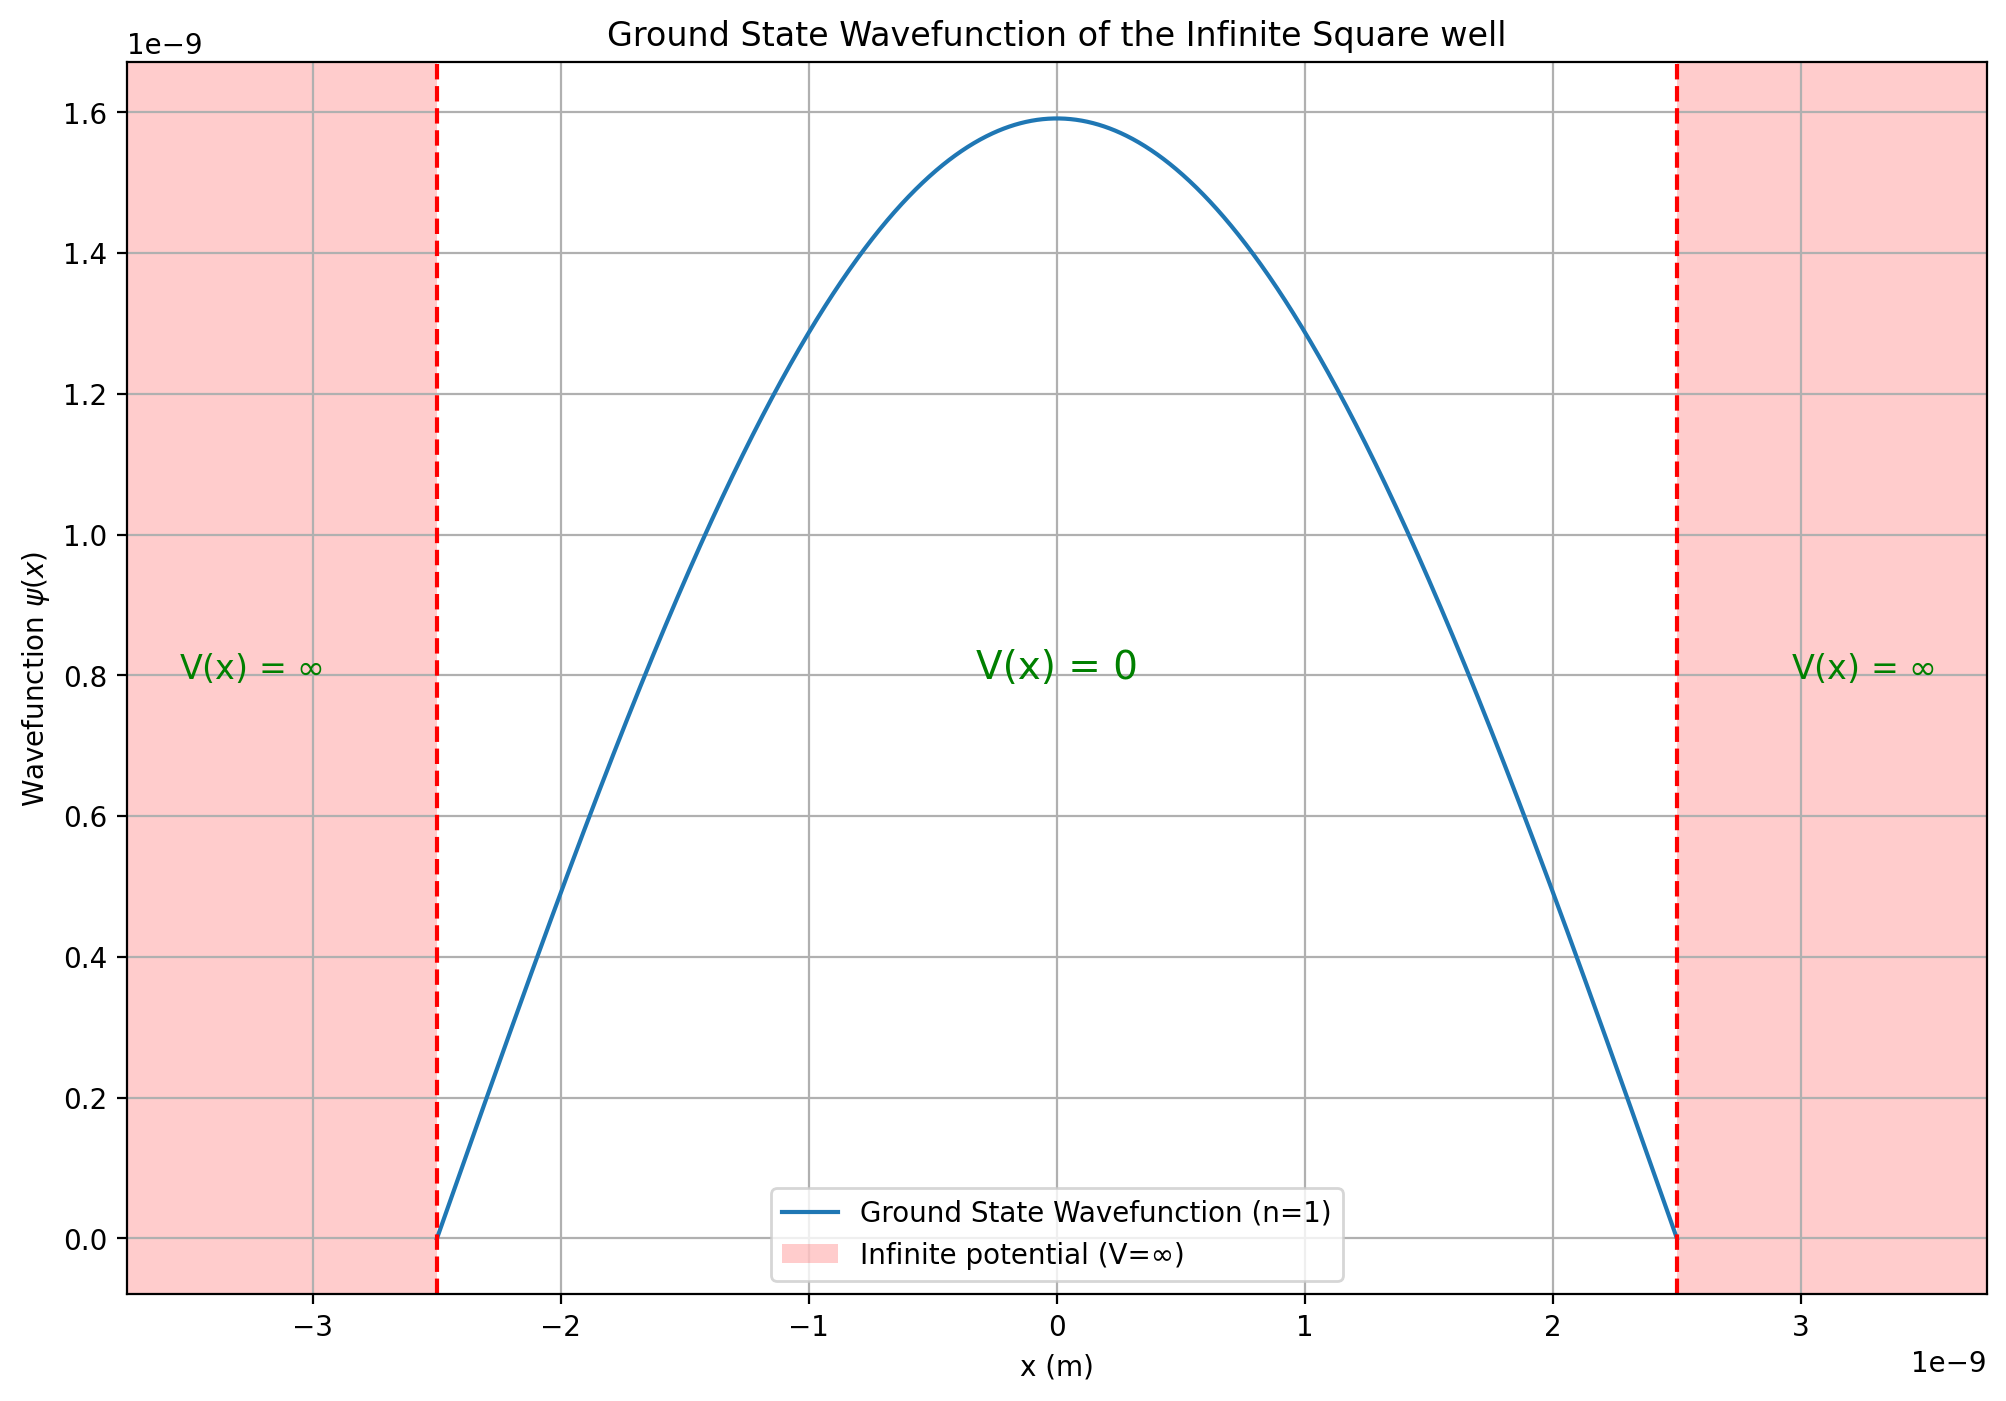

In [36]:
# Plot the ground state wavefunction 
plt.figure(figsize=(12,8))
plt.plot(x_points, psi, label = 'Ground State Wavefunction (n=1)')
plt.title('Ground State Wavefunction of the Infinite Square well')
plt.xlabel('x (m)')
plt.ylabel(r'Wavefunction $\psi(x)$')
plt.grid()

# Shade the infinite potential regions 
plt.axvspan(-1.5*a, -a, facecolor='red', alpha=0.2, label='Infinite potential (V=∞)')
plt.axvspan(a, 1.5*a, facecolor='red', alpha=0.2)
plt.axvline(-a,color = 'r', linestyle = '--', linewidth = '1.5')   # Lines displaying boundary conditions
plt.axvline(a,color  = 'r', linestyle = '--', linewidth = '1.5')

plt.xlim(-1.5*a, 1.5*a) # Extend the x-limit 

# Text annotations for the plot
plt.text(-1.3*a, max(psi)*0.5, r'V(x) = $\infty$', ha='center', fontsize=12, color='green')
plt.text(1.3*a, max(psi)*0.5, 'V(x) = $\infty$', ha='center', fontsize=12, color='green')
plt.text(0, max(psi)*0.5, 'V(x) = 0', ha='center', fontsize=14, color='green')

plt.legend(loc='best')

In [37]:
def norm_psi(func):  
    """
    Computes normalised wavefunctions using the Trapezoidal rule 
    
    Parameters
    ----------
    func: The wavefunction that has to be normalised
    
    Returns
    -------
    norm_psi(np.ndarray): Array of normalised wavefunctions at each discrete x position
    
    """
    # Compute the probability density, f(x) = |ψ(x)|^2
    f_x =  ( np.abs(func) ) ** 2

    # Trapezoidal rule
    I_1 = (0.5 * f_x[0] + 0.5 * f_x[-1])  # 1/2 f(a) + 1/2 f(b)
    I_2 = np.sum(f_x[1:-1])               # Sum f(x+kh) from 1 to N-1

    I = h*(I_1 + I_2)
    
    # Normalise the wavefunction
    norm_psi = psi / np.sqrt(I)

    return norm_psi

In [38]:
def known_psi(n):
    """
    Computes the existing analytical solutions for the normalised wavefunctions for an a infinite square well.
    
    
    Parameters
    ----------
    n(float): The quantum number
    
    Returns
    -------
    known_psi(array-like): A Numpy array containing the known normalised wavefucntion values for each x value
    
    
    """
    
    # If n is an odd number
    if n % 2 ==1:
        
        known_psi = np.sqrt(2/d) * np.cos( (n * np.pi * x_points) / d)  # Normalised wavefunction when n is odd
        
    else:
        
        known_psi = np.sqrt(2/d) * np.sin( (n * np.pi * x_points) / d)  # Normalised wavefunction when n is even
    
    
    return known_psi

In [40]:
# Print results alongside relative error
print(f'Normalised wavefunction : {norm_psi(psi)}')
print("---------------------------------------------------------")
print(f'Analytical solution : {known_psi(1)}')
print("---------------------------------------------------------")
print(f'Relative error: {error(norm_psi(psi),known_psi(1))}')

Normalised wavefunction : [0.00000000e+00 3.14159003e+01 6.28317231e+01 ... 6.28494773e+01
 3.14336545e+01 1.77542655e-02]
---------------------------------------------------------
Analytical solution : [1.22464680e-12 3.14159136e+01 6.28317497e+01 ... 6.28317497e+01
 3.14159136e+01 1.22464680e-12]
---------------------------------------------------------
Relative error: [1.00000000e+00 4.23851526e-07 4.23850809e-07 ... 2.82143131e-04
 5.64711507e-04 1.44974580e+10]


#### Comparison with analytical solutions

The results display extremely small relative error's for non-boundary values, suggesting an excellent match between the estimated wavefunction solutions and the analytical solutions. For most of the solutions, the relative error is approximately on the order of $10^{-7}$, indicating a high accuracy of the numerical technique.

However, this accuracy decreases at the boundaries, especially for $\psi(a)$, where a high relative error was observed. This discrepency may be due to the finite step size (N=2000) used; preventing the Secant method to converge to the exact point. Conversly, it could also be a normalisation error. 

Additionally, the analytical solution has perfect symmetry. Despite the calculated eigenfunctions exhibiting symmetry, it is not exact. This indicates the numerical methods used can introduce minor discrepancies.

### Task 3.3 : Finding the Higher Energy States

In [41]:
def inf_sq_well(n):
    """ 
    Calculates the analytical solutions for an infinite square well given the principle quantum number, n=1
    
    """
    E = (np.pi**2 * h_bar**2 * n**2) / (2 * m * d**2)  
    
    return E

In [45]:
def matrix(n,v_func):
    """
    Constructs the hamiltonian matrix and computes its eigenvalue(energy), using matrix discretisation.
    
    Parameters
    ----------
    n(float): The principle quantum number
    v_func  : A function that returns the potential, V(x) at a given x position
    
    Returns
    -------
    E(float): The eigenvalue found from the hamiltonian [Joules]
    
    """
    # Compute kinetic energy coefficient
    KE = h_bar**2 / (2 * m * h**2)
    
    main_diag = 2 * KE + v_func(x_points) # Main diagonal = KE + potential energy
    off_diag = -KE * np.ones(N-1)         # Off diagonal  = KE for neighboring points
    
    # Construct matrix
    matrix = [off_diag, main_diag, off_diag]
    
    # The offset
    offset = [-1, 0, 1]
    
    # Construct Hamiltonian matrix 
    H = diags(matrix, offset, shape=(N, N), format='csr')

    # Solve eigenvalue problem to get initial energy estimates
    eigenvalues, _ = eigsh(H, k=n, which='SA')                   # SA returns lowest eigenvalue
    
    return eigenvalues[-1]  # nth energy eigenvalue

#############################################################################################################################################
# Code adapted from: PHAS0029-C5-Instructions.ipynb found in the thursday group in cocalc project                            
# Available from: https://cocalc.com/projects/1d655ea0-9de0-4b57-b84f-b6a1896915a0/files/Assignment%20C5%20-%20linear%20algebra/PHAS0029-C5- # assignment.ipynb
#############################################################################################################################################

The matrix function is the method to determine the initial energy guesses. The kinetic energy operator for a particle yields: 

$$ \hat{T} =  - \frac{ \hbar ^2}

In [43]:
def energy(n, v_func, e1, e2):
    """
    Estimates the energy eigenvalue for a given quantum number `n` and potential function `v_func`
    using a matrix discretization method as an initial guess, followed by refinement with 
    the Secant method and RK4 integration.
    
    Args:
        n (int): Quantum state number (n ≥ 1)
        v_func (function): Function returning the potential energy at a given x
        N (int): Number of spatial grid points for matrix discretization
    
    Returns:
        tuple: (E_numerical, E_matrix, E_analytical)
            E_numerical: Energy eigenvalue estimated using Secant + RK4 (in Joules)
            E_matrix: Energy from the matrix discretization (in Joules)
            E_analytical: Infinite square well energy for reference (in Joules)
    """
    
   
    # Use matrix eigenvalue as an initial guess for Secant method
    E1 = e1 * 0.95
    E2 = e2 * 1.05

    # Set the tolerance for convergence (in Joules)
    tolerance = e / 100000

    # Evaluate psi at the boundary x = -a
    psi1, psi2 = RK4(rhs_schrodinger, E1, v_func)[-1], RK4(rhs_schrodinger, E2, v_func)[-1]

    # Iterate the Secant Method
    while abs(E2 - E1) > tolerance:
        E3 = E2 - psi2 * (E2 - E1) / (psi2 - psi1)

        # Reset E1 and E2
        E1, E2 = E2, E3

        # Recalculate psi values for new guesses
        psi1, psi2 = RK4(rhs_schrodinger, E1, v_func)[-1], RK4(rhs_schrodinger, E2, v_func)[-1]

    

    return E3

For n = 2:
 . Estimated energy eigenvalue is:  0.06016 eV
 . Known energy eigenvalue is:      0.06016 eV
 . Estimated wavefunction: [  0.          62.8317547  125.66288928 188.49278362] 
 . Known wavefunction:     [-2.44929360e-12 -6.28317497e+01 -1.25662879e+02 -1.88492769e+02] 
--------------------------------------------------


For n = 3:
 . Estimated energy eigenvalue is:  0.13537 eV
 . Known energy eigenvalue is:      0.13537 eV
 . Estimated wavefunction: [  0.          94.24743079 188.49276866 282.73392076] 
 . Known wavefunction:     [-3.67394040e-12 -9.42474308e+01 -1.88492769e+02 -2.82733921e+02] 
--------------------------------------------------


For n = 4:
 . Estimated energy eigenvalue is:  0.24066 eV
 . Known energy eigenvalue is:      0.24066 eV
 . Estimated wavefunction: [  0.         125.66287931 251.32079767 376.96879431] 
 . Known wavefunction:     [4.89858720e-12 1.25662879e+02 2.51320798e+02 3.76968794e+02] 
--------------------------------------------------


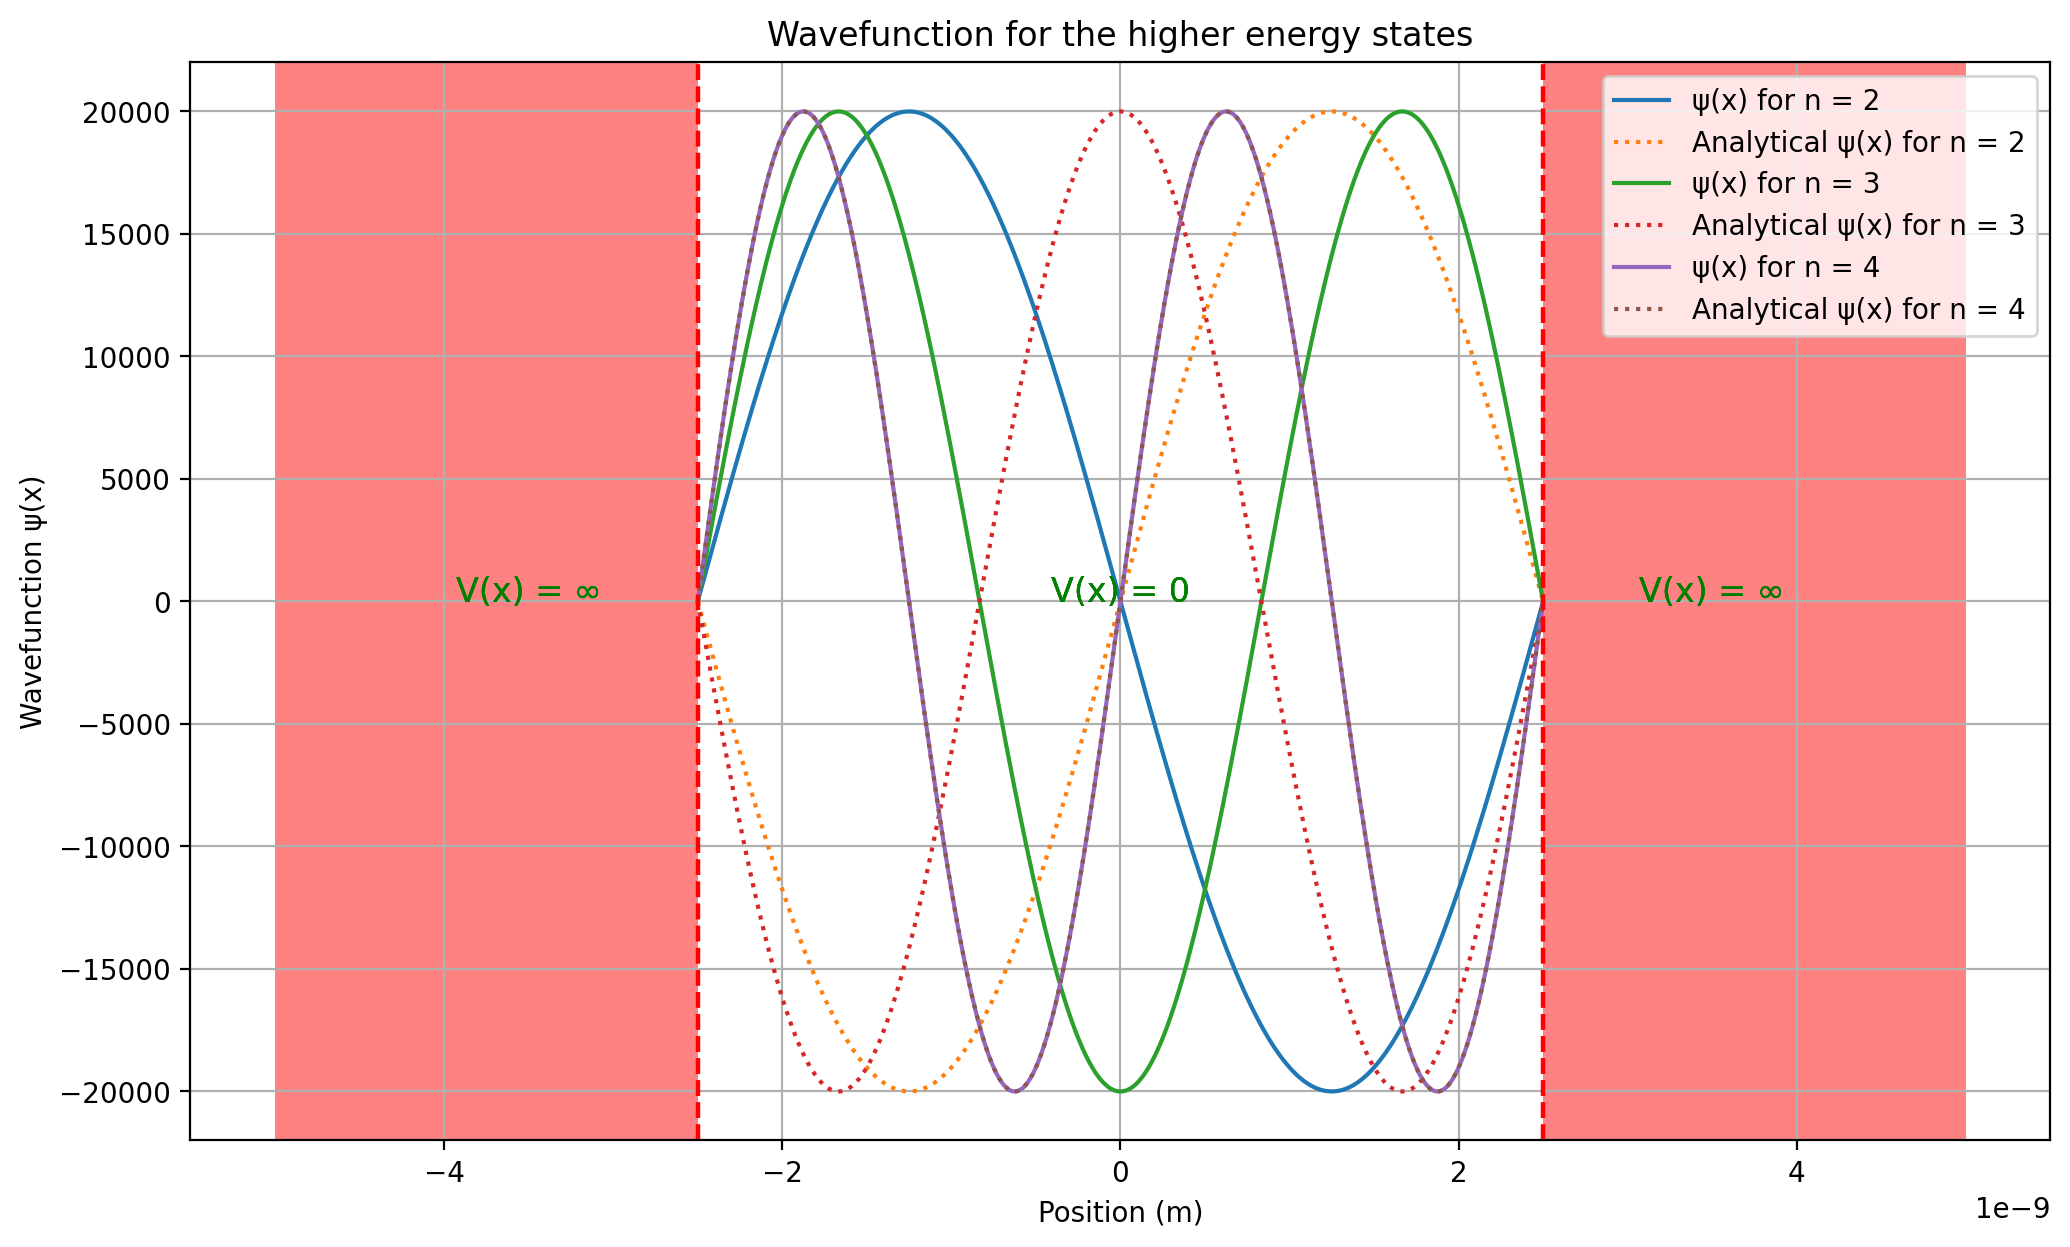

In [44]:
# Finding the first few excited energy states (n = 2, 3 , 4)
for i in range (2,5):
    
    guess = matrix(i, V)
    
    higher_state = energy(i,V, guess, guess)
    print(f'For n = {i}:')
    print(f' . Estimated energy eigenvalue is: {higher_state / e : .5f} eV')
    print(f' . Known energy eigenvalue is:     {inf_sq_well(i) / e : .5f} eV')
    
    psi = RK4(rhs_schrodinger,higher_state, V)
    
    print(f' . Estimated wavefunction: {norm_psi(psi)[:4] } ')
    print(f' . Known wavefunction:     {known_psi(i)[:4]} ')
    
    print('--------------------------------------------------')
    
    plt.plot(x_points, norm_psi(psi), label = f'ψ(x) for n = {i}')
    plt.plot(x_points, known_psi(i), label = f'Analytical ψ(x) for n = {i}', linestyle = "dotted")
    # Highlight the infinite potential regions with shading
    plt.axvspan(-2*a, -a, facecolor='red', alpha=0.2)
    plt.axvspan(a, 2*a, facecolor='red', alpha=0.2)

    # Add text annotations for the infinite regions
    plt.text(-1.4*a, max(psi)*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
    plt.text(1.4*a, max(psi)*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
    plt.text(0, max(psi)*0.01, 'V(x) = 0', ha='center', fontsize=12, color='green')
    plt.title('Wavefunction for the higher energy states')
    plt.axvline(-a,color = 'red', linestyle = '--', linewidth = '1.5')
    plt.axvline(a,color  = 'red', linestyle = '--', linewidth = '1.5')
    plt.xlabel('Position (m)')
    plt.ylabel('Wavefunction ψ(x)')
    plt.legend()
    plt.grid()
    

For the higher energy states, the estimated energies converge to the analytical results, confirming the Secant method is working without error. The method for choosing the initial guesses was derived by considering the energy spacing between consecutive states. Since the energy levels are proportional to $n^2$, as the electron moves away from the ground state, the energy gaps become much larger. Therefore, the initial guesses are determined as :

$$E_{n-1} + (E_n - E_{n-1}) * C $$ 

Where n-1 is the previous state, and the second term is the energy spacing multiplied by a constant, this is to slightly deviate the guesses from the expected energy so that the Secant method converges properly. Additionally, by plotting each energies corresponding wavefunction against position the shape and amplitude can be observed. The amplitude decreases as the electron moves to a higher energy state, n and the number of peaks (anti-nodes) is proportional to the $n^{th}$ state. Furthermore, the wavefunction oscillates at a higher frequency for higher energy states and to satisfy its normalisation constant, the amplitude decreases.

It can be observed from the plot above, that the analytical solutions have a phase offset resulting in an anti-phase with its corresponding $\psi(x)$. An unusual observation is that for n=4, both plots overlap one another.

For n = 25:
 . Estimated energy eigenvalue is:  9.40075 eV
 . Known energy eigenvalue is:      9.40075 eV
For n = 25:
 . Estimated wavefunction: [   0.          785.19633516 1569.18195443 2350.74800883] 
 . Known wavefunction:     [-4.91096681e-12  7.85196315e+02  1.56918191e+03  2.35074795e+03] 
--------------------------------------------------


For n = 26:
 . Estimated energy eigenvalue is:  10.16786 eV
 . Known energy eigenvalue is:      10.16786 eV
For n = 26:
 . Estimated wavefunction: [   0.          816.58706585 1631.81228383 2444.31607731] 
 . Known wavefunction:     [ 3.92134568e-11 -8.16587040e+02 -1.63181223e+03 -2.44431600e+03] 
--------------------------------------------------


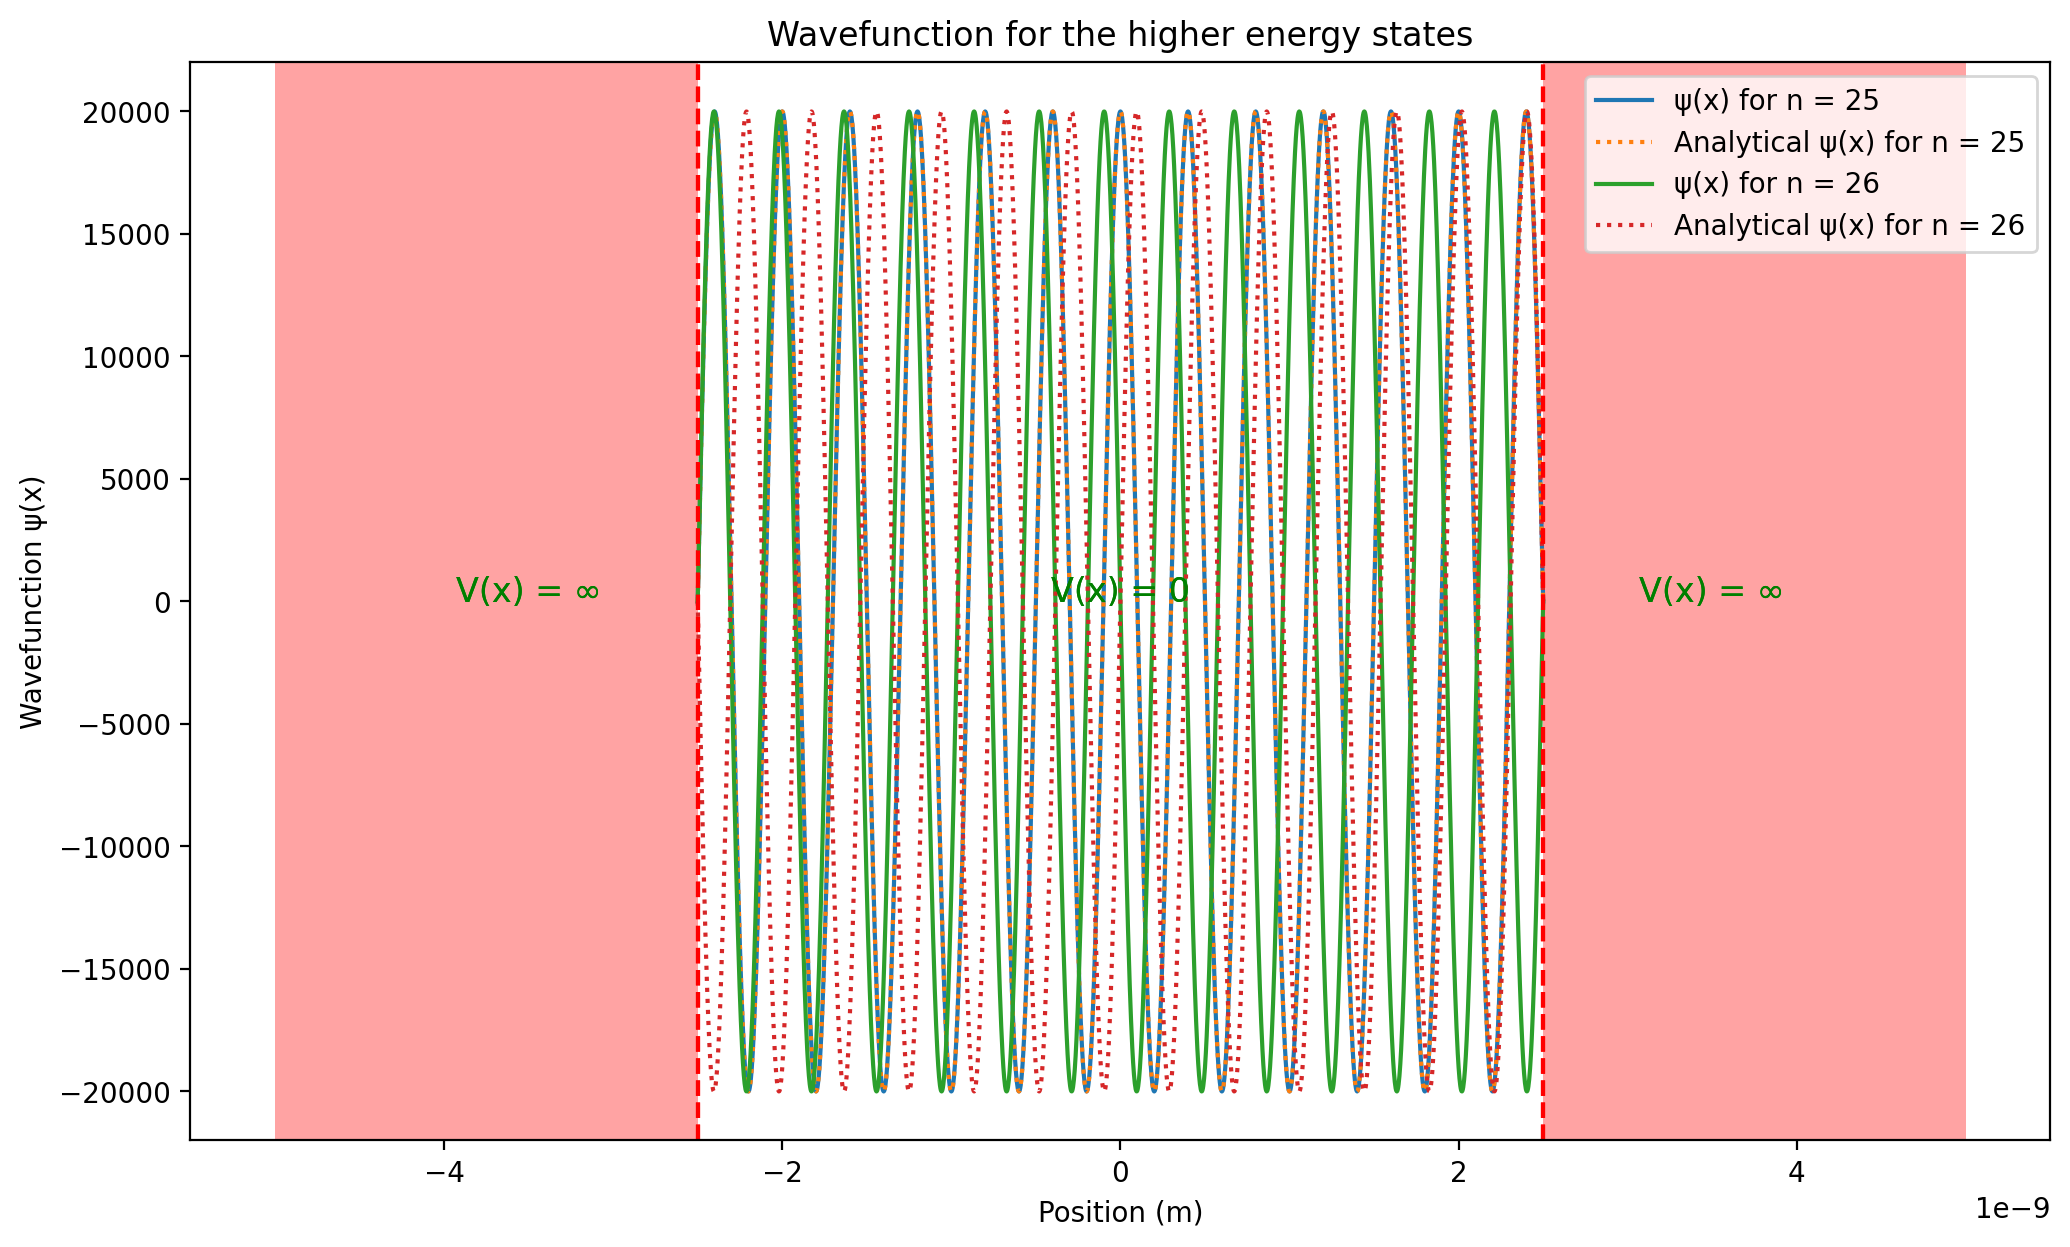

In [18]:
# Finding eigenstates for higher states (n = 25 and 26)

for i in range (25,27):
    
    guess = matrix(i,V)
    
    higher_state = energy(i,V, guess, guess)
    print(f'For n = {i}:')
    print(f' . Estimated energy eigenvalue is: {higher_state / e : .5f} eV')
    print(f' . Known energy eigenvalue is:     {inf_sq_well(i) / e : .5f} eV')
    
    psi = RK4(rhs_schrodinger,higher_state, V)
    
    print(f'For n = {i}:')
    print(f' . Estimated wavefunction: {norm_psi(psi)[:4] } ')
    print(f' . Known wavefunction:     {known_psi(i)[:4]} ')
    
    print('--------------------------------------------------')
    
    plt.plot(x_points, norm_psi(psi), label = f'ψ(x) for n = {i}')
    plt.plot(x_points, known_psi(i), label = f'Analytical ψ(x) for n = {i}', linestyle = "dotted")
    plt.axvline(-a,color = 'red', linestyle = '--', linewidth = '1.5')
    plt.axvline(a,color  = 'red', linestyle = '--', linewidth = '1.5')
    # Highlight the infinite potential regions with shading
    plt.axvspan(-2*a, -a, facecolor='red', alpha=0.2)
    plt.axvspan(a, 2*a, facecolor='red', alpha=0.2)

    # Add text annotations for the infinite regions
    plt.text(-1.4*a, max(psi)*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
    plt.text(1.4*a, max(psi)*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
    plt.text(0, max(psi)*0.01, 'V(x) = 0', ha='center', fontsize=12, color='green')
    plt.title('Wavefunction for the higher energy states')
    plt.xlabel('Position (m)')
    plt.ylabel('Wavefunction ψ(x)')
    plt.legend()
    plt.grid()
    

When finding the eigenstates for n = 25 and 26, the estimated energy converges very closely with the analytical results - up to five decimal places. Similar, to the case above the wavefunction plots for n=25 are in anti-phase while the plots for n=26 overlap perfectly. This may be due to the initial condition of $\phi$ being set to 1, causing a phase offset in some eigenfunctions.

### Task 4: The infinite "unsquare" well

#### I. Harmonic potential

In [19]:
def harmonic(x):
    """
    For a given spatial coordinate the function returns a harmonic potential.
    
    Arg:
    ---
    x (float or np.ndarray): Position of the electron on the x-axis
    
    Return:
    ------
    v_harm (float or np.ndarray): The harmonic potential 
    
    """
    
    return (v0 * x**2) / a**2

In [20]:
def h_psi(n):
    
    """
    Compute the normalised harmonic oscillator wavefunction using hermite polynomials
    
    Arg:
    ---
    n(float): The quantum number
    
    Return:
    ------
    Array-like: Numpy array containing the normalised harmonic oscillator wavefunctions
    
    
    """
    
    w = np.sqrt((2*v0) / (a**2 * m))
    
    alpha = np.sqrt(m * w / h_bar)
    
    norm = 1 / np.sqrt(2**n * np.math.factorial(n)) * (alpha / np.pi)**0.25
    
    hermite_poly = sp.hermite(n)(alpha * x_points)
    
    return norm * np.exp(-0.5 * (alpha * x_points)**2) * hermite_poly
   

In [21]:
def harmonic_energy(n):
    w = np.sqrt((2*v0) / (a**2 * m))
    # Compute the ground state energy (n=1)
    E = (n + 0.5) * h_bar * w  
     # Create spatial grid
        
    return E

In [22]:
# Finding three energy eigenvalues for the harmonic potential (n=1,2,3)
for i in range(0,3):
    
    guess = harmonic_energy(i)
    
    harmonic_state = energy(i,harmonic,guess,guess)    
    
    print(f'For n = {i}:')
    print(f' . Estimated energy eigenvalue is: {harmonic_state / e : .7f} eV')
    print(f' . Known energy eigenvalue is:     {harmonic_energy(i) / e : .7f} eV')
    
    
    psi = RK4(rhs_schrodinger,harmonic_state , harmonic)
    
    print(f'For n = {i}:')
    print(f' . Estimated wavefunction is: {norm_psi(psi)[ : 4]} ')
    print(f' . Known wavefunction is:     {h_psi(i)[ : 4]} ')
    
    print('--------------------------------------------------')
    
   

For n = 0:
 . Estimated energy eigenvalue is:  2.0657154 eV
 . Known energy eigenvalue is:      2.0657154 eV
For n = 0:
 . Estimated wavefunction is: [0.00000000e+000 7.64902957e-131 1.61800674e-130 2.65731724e-130] 
 . Known wavefunction is:     [5.73770042e-72 8.05066530e-72 1.12921986e-71 1.58335418e-71] 
--------------------------------------------------


For n = 1:
 . Estimated energy eigenvalue is:  6.1971461 eV
 . Known energy eigenvalue is:      6.1971461 eV
For n = 1:
 . Estimated wavefunction is: [0.00000000e+000 3.25206093e-127 6.87687060e-127 1.12883505e-126] 
 . Known wavefunction is:     [-1.49371123e-70 -2.09375585e-70 -2.93384946e-70 -4.10962326e-70] 
--------------------------------------------------


For n = 2:
 . Estimated energy eigenvalue is:  10.3285770 eV
 . Known energy eigenvalue is:      10.3285768 eV
For n = 2:
 . Estimated wavefunction is: [0.00000000e+000 1.06776392e-125 2.25717682e-125 3.70323821e-125] 
 . Known wavefunction is:     [2.74561190e-69 3.84470251e-69 5.38193308e-69 7.53122810e-69] 
--------------------------------------------------


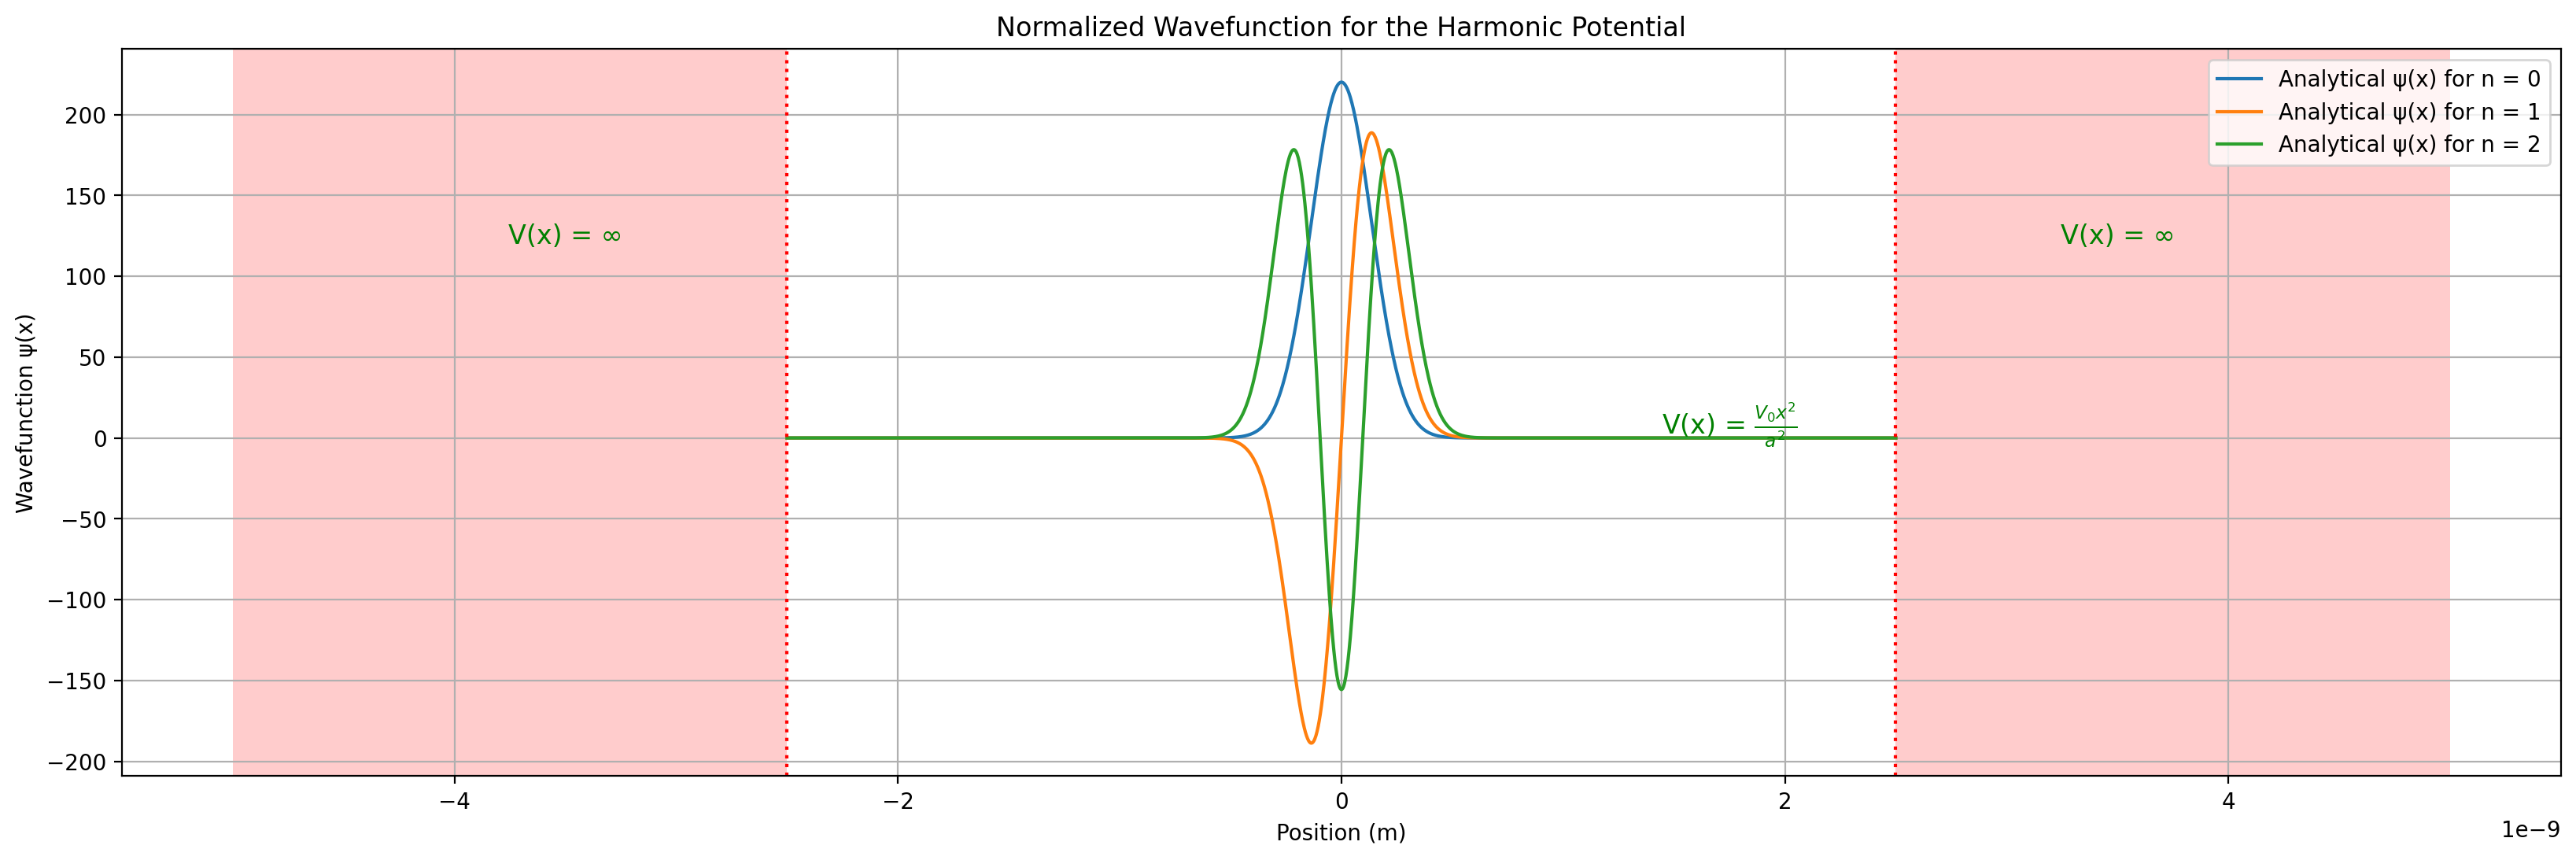

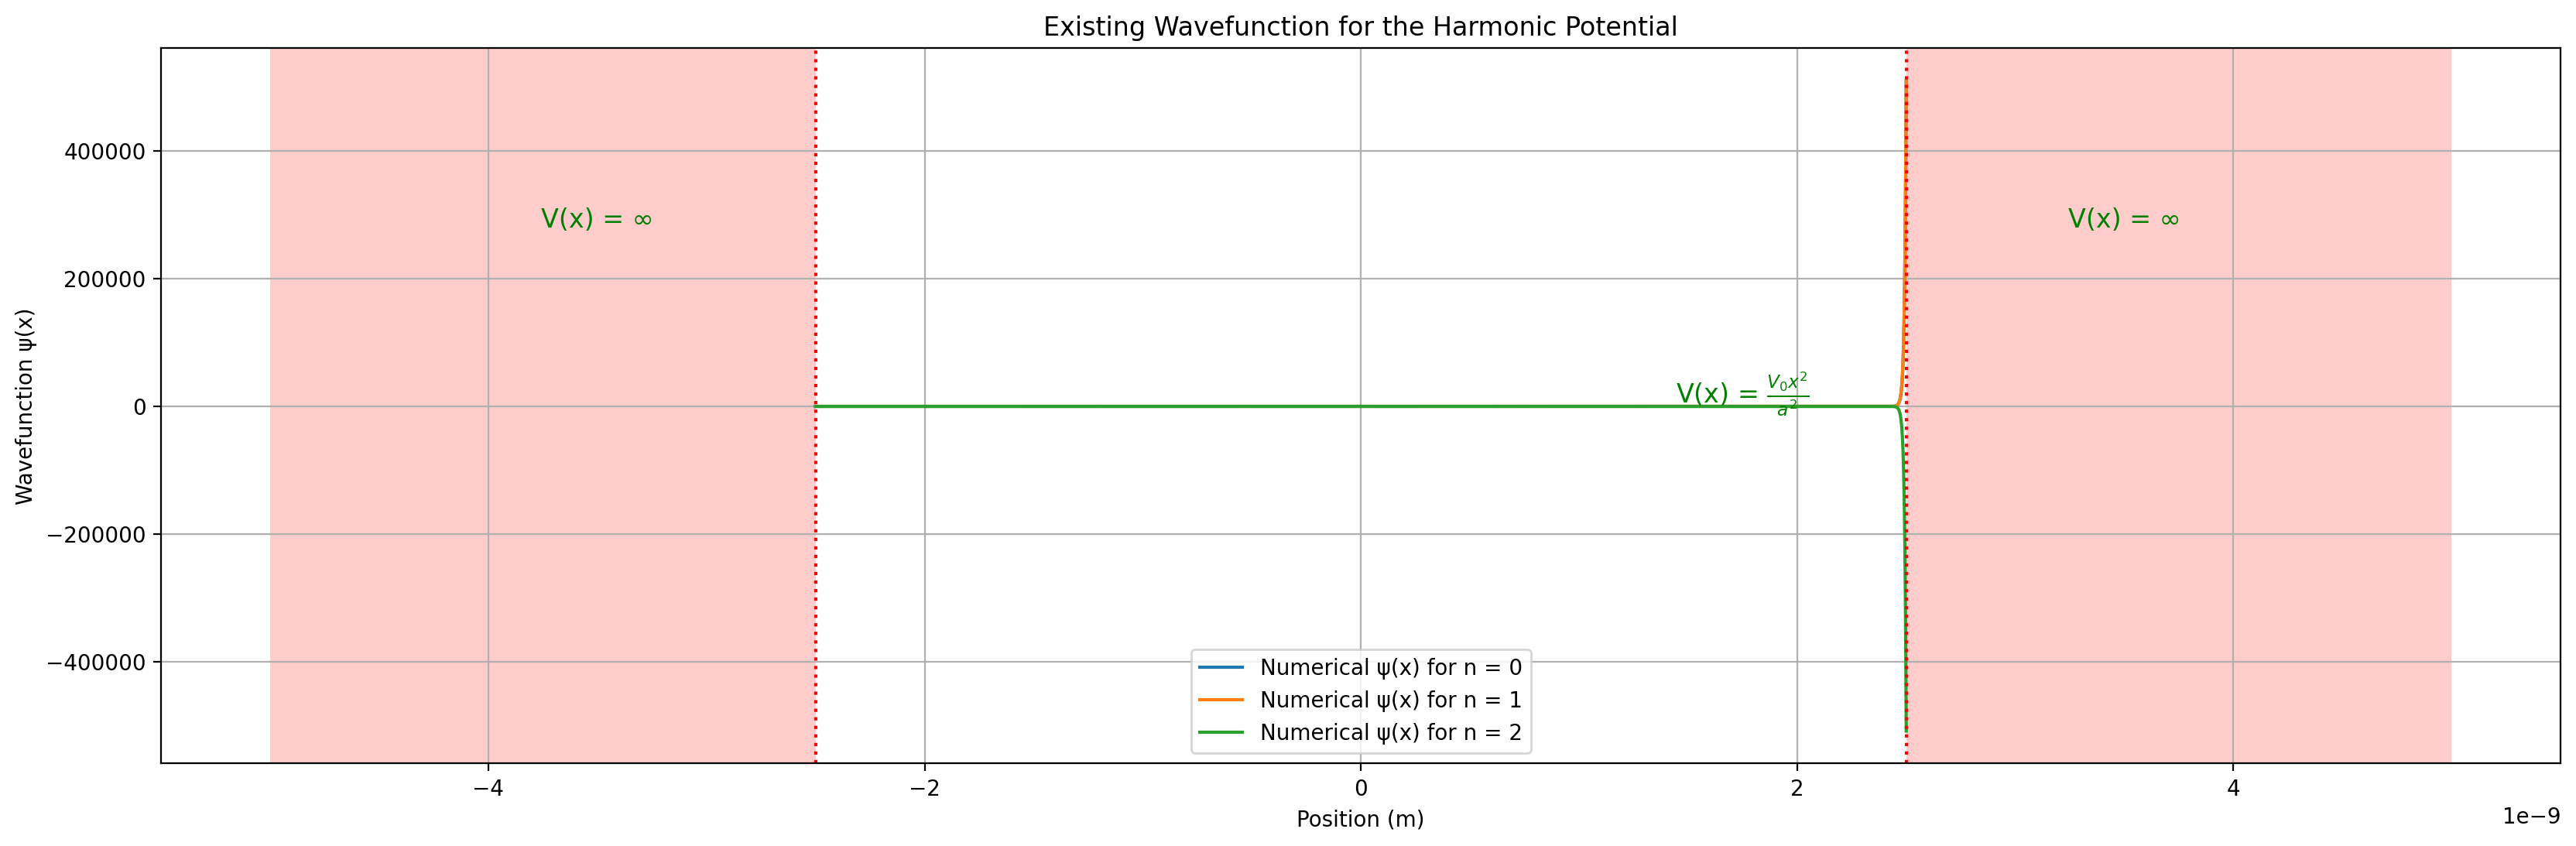

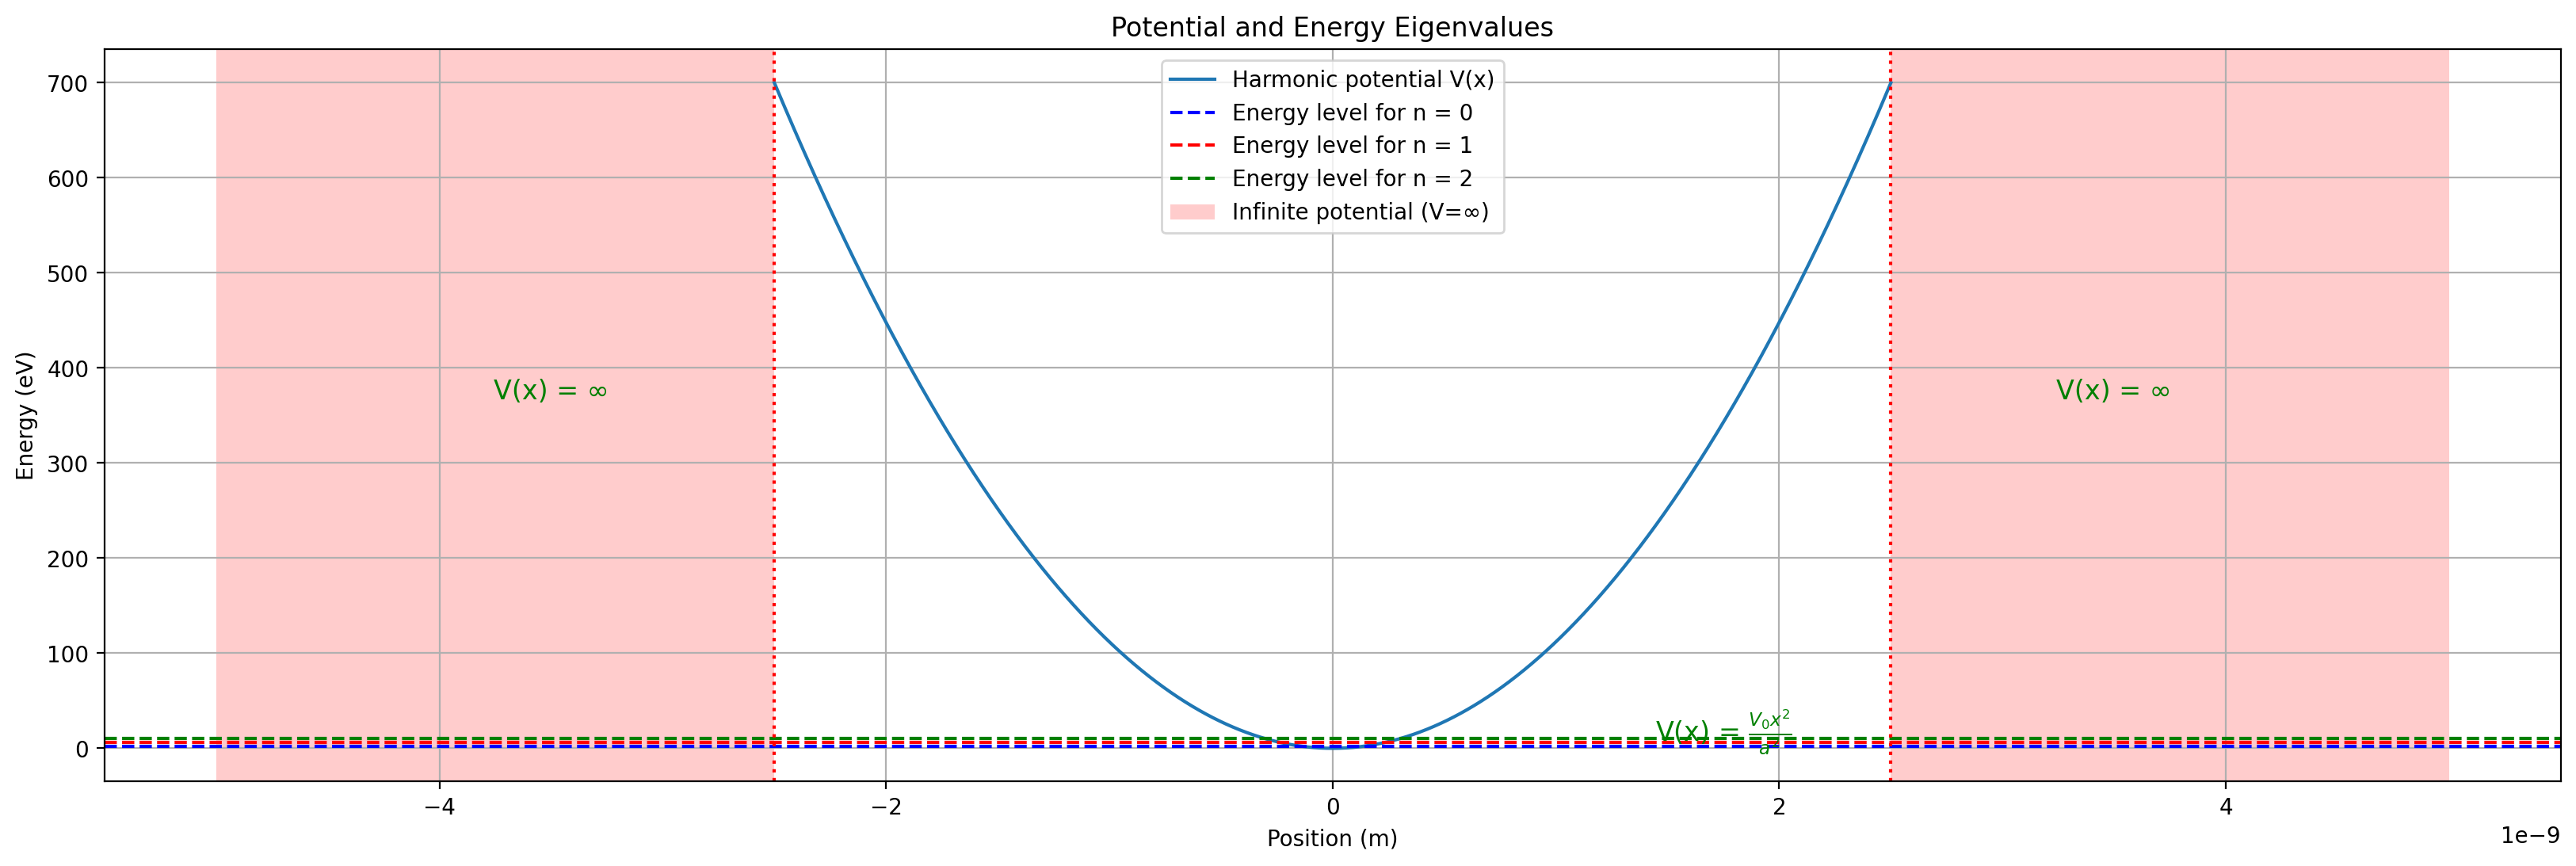

In [23]:
# Graph 1: Normalized Analytical Wavefunctions for n=0,1,2
plt.figure(figsize=(20, 6))

for n in range(0, 3):
    plt.plot(x_points, h_psi(n), label=f'Analytical ψ(x) for n = {n}')
plt.axvline(-a, color='red', linestyle='dotted', linewidth=1.5)
plt.axvline(a, color='red', linestyle='dotted', linewidth=1.5)
plt.title('Normalized Wavefunction for the Harmonic Potential')
plt.xlabel('Position (m)')
plt.ylabel('Wavefunction ψ(x)')
plt.legend(loc='best')
plt.grid()
# Highlight the infinite potential regions
plt.axvspan(-2*a, -a, facecolor='red', alpha=0.2, label='Infinite potential (V=∞)')
plt.axvspan(a, 2*a, facecolor='red', alpha=0.2)
plt.text(-1.4*a, plt.ylim()[1]*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
plt.text(1.4*a, plt.ylim()[1]*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
plt.text(0.7*a, plt.ylim()[1]*0.01, r'V(x) = $\frac{V_0x^2}{a^2}$', ha='center', fontsize=12, color='green')
plt.show()

# Graph 2: Existing (Numerical) Wavefunction Solutions for n=1,2,3
plt.figure(figsize=(20, 6))

for n in range(0, 3):
    
    guess = harmonic_energy(n)
    
    state = energy(n, harmonic, guess, guess)
    
    psi = RK4(rhs_schrodinger, state, harmonic)
    plt.plot(x_points, norm_psi(psi), label=f'Numerical ψ(x) for n = {n}')
plt.axvline(-a, color='red', linestyle='dotted', linewidth=1.5)
plt.axvline(a, color='red', linestyle='dotted', linewidth=1.5)
plt.text(-1.4*a, plt.ylim()[1]*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
plt.text(1.4*a, plt.ylim()[1]*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
plt.text(0.7*a, plt.ylim()[1]*0.01, r'V(x) = $\frac{V_0x^2}{a^2}$', ha='center', fontsize=12, color='green')
plt.title('Existing Wavefunction for the Harmonic Potential')
plt.xlabel('Position (m)')
plt.ylabel('Wavefunction ψ(x)')
plt.legend(loc='best')
plt.grid()
plt.axvspan(-2*a, -a, facecolor='red', alpha=0.2)
plt.axvspan(a, 2*a, facecolor='red', alpha=0.2)
plt.show()

# Graph 3: Harmonic Potential and Energy Eigenvalues for n=1,2,3
plt.figure(figsize=(20, 6))
plt.plot(x_points, harmonic(x_points)/e, label='Harmonic potential V(x)')
colors = ['red', 'green', 'blue']

for n in range(0, 3):
    
    guess = harmonic_energy(n)
    
    state = energy(n, harmonic, guess, guess)
    plt.axhline(y=state/e, linestyle='--', color=colors[n-1], label=f'Energy level for n = {n}')
plt.axvline(-a, color='red', linestyle='dotted', linewidth=1.5)
plt.axvline(a, color='red', linestyle='dotted', linewidth=1.5)
plt.axvspan(-2*a, -a, facecolor='red', alpha=0.2, label='Infinite potential (V=∞)')
plt.axvspan(a, 2*a, facecolor='red', alpha=0.2)
plt.text(-1.4*a, plt.ylim()[1]*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
plt.text(1.4*a, plt.ylim()[1]*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
plt.text(0.7*a, plt.ylim()[1]*0.01, r'V(x) = $\frac{V_0x^2}{a^2}$', ha='center', fontsize=12, color='green')
plt.title('Potential and Energy Eigenvalues')
plt.xlabel('Position (m)')
plt.ylabel('Energy (eV)')
plt.legend(loc='best')
plt.grid()
plt.show()

#### Comparison with the analytical solutions

The numerical solutions for the eigenvalues agree remarkably well with its analytical predictions - for $n=0$ and $n=1$ it matches to many decimal points and within six deciaml points for $n=2$ - indicating the reliability of the Secant method. However, the normalised wavefunctions exhibit huge discrepancies while the analytical ground state solution exhibits a gaussian curve
with increasing nodes for a higher $n$ value, the numerical solutions decay immediately to values around $10^{-125}$ and sharply changes at the boundary, $x = -a$. This behaviour is unphysical, which could be due to the high harmonic potential embedded within the well ($V_0 = 700e$) this causes a steep gradient causing the wavefunction to decay rapidly. The normalised wavefunction deviates by a factor of around $10^{60}$ from the analytical solutions and this highlights an error in normalisation. 

Additionally, from the plot of the harmonic potential further reinforces this unphysical behaviour, as the computed energy levels are insignificant compared to the rest of the potential curve. This means that the electron is deeply confined within the potential well, which prevents them to exhibit oscillations. The harmonic potential can be adjusted to a lower value, such as $V_0 \approx e$ to observe more physical behaviour in the system. 


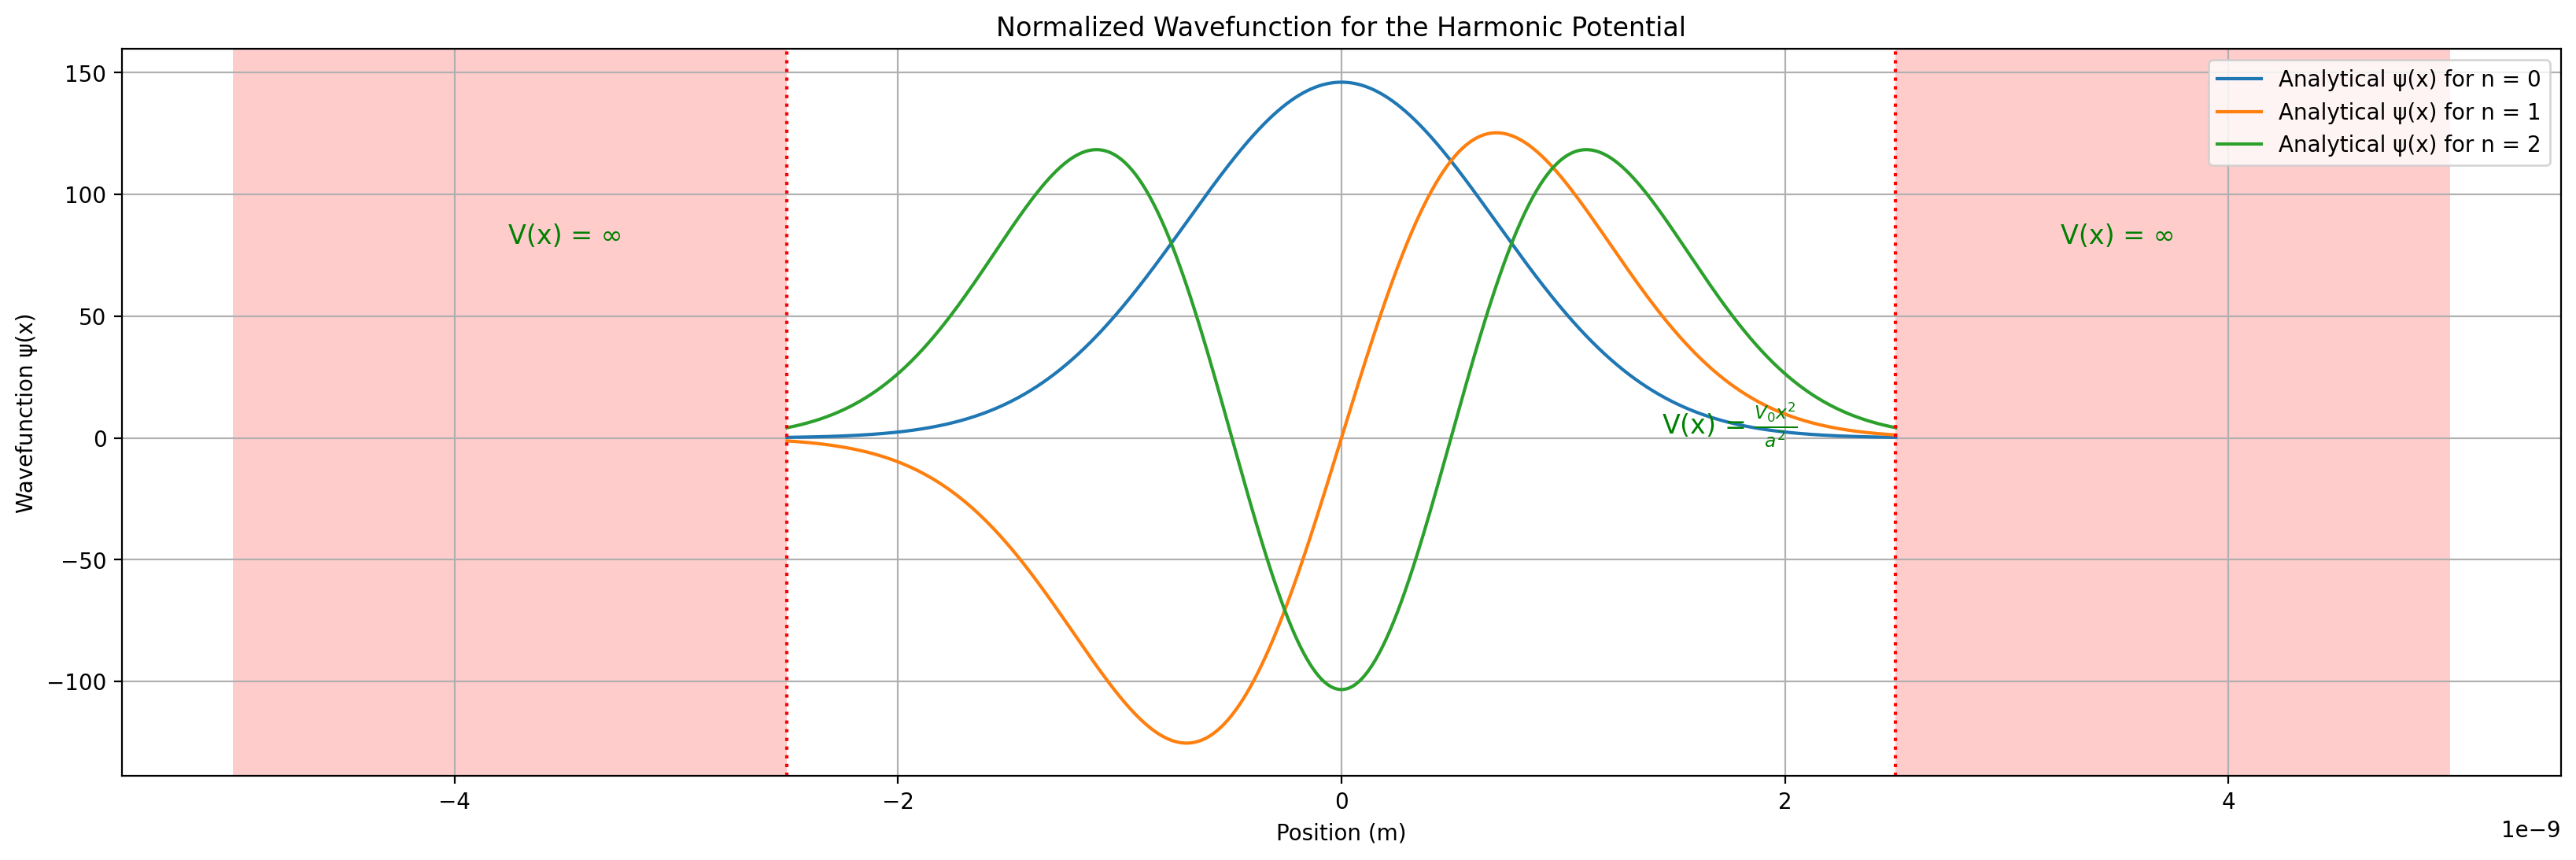

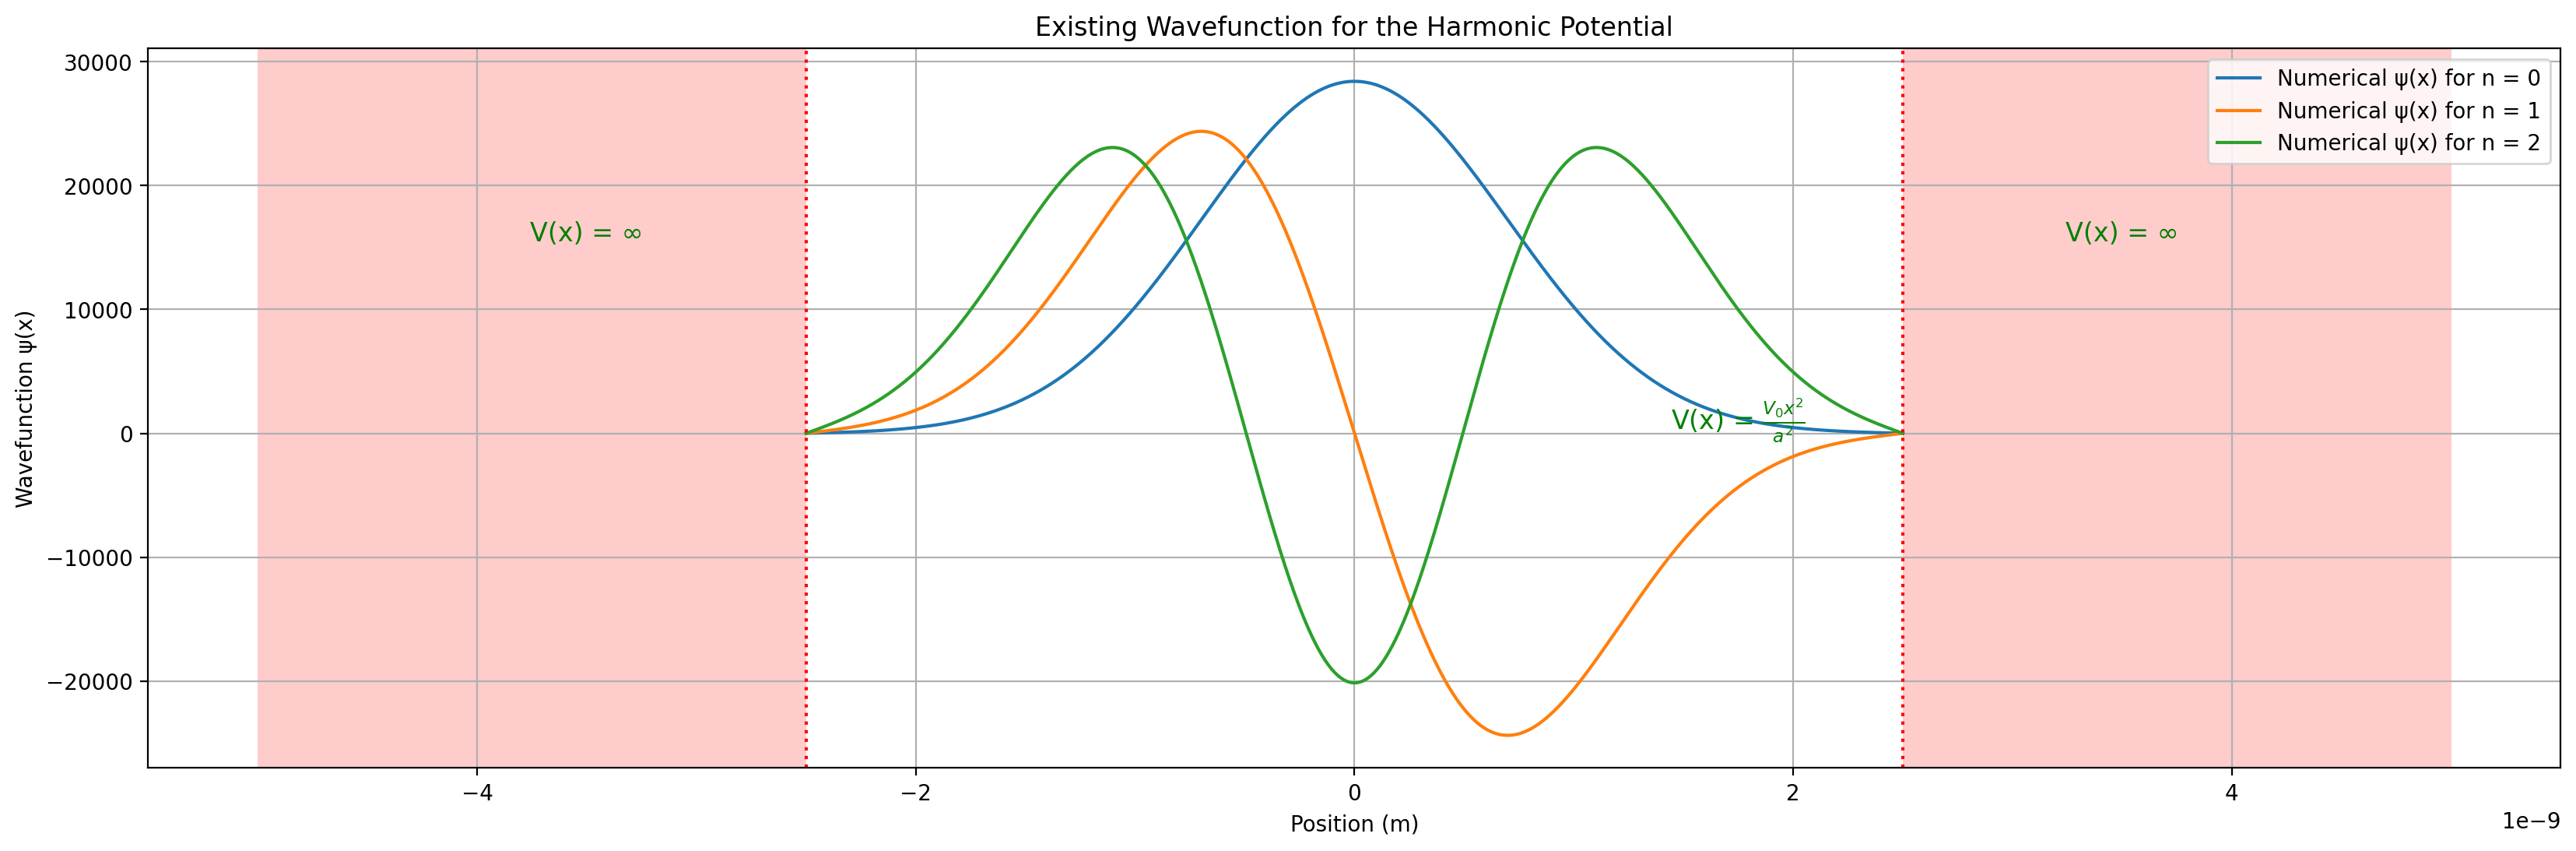

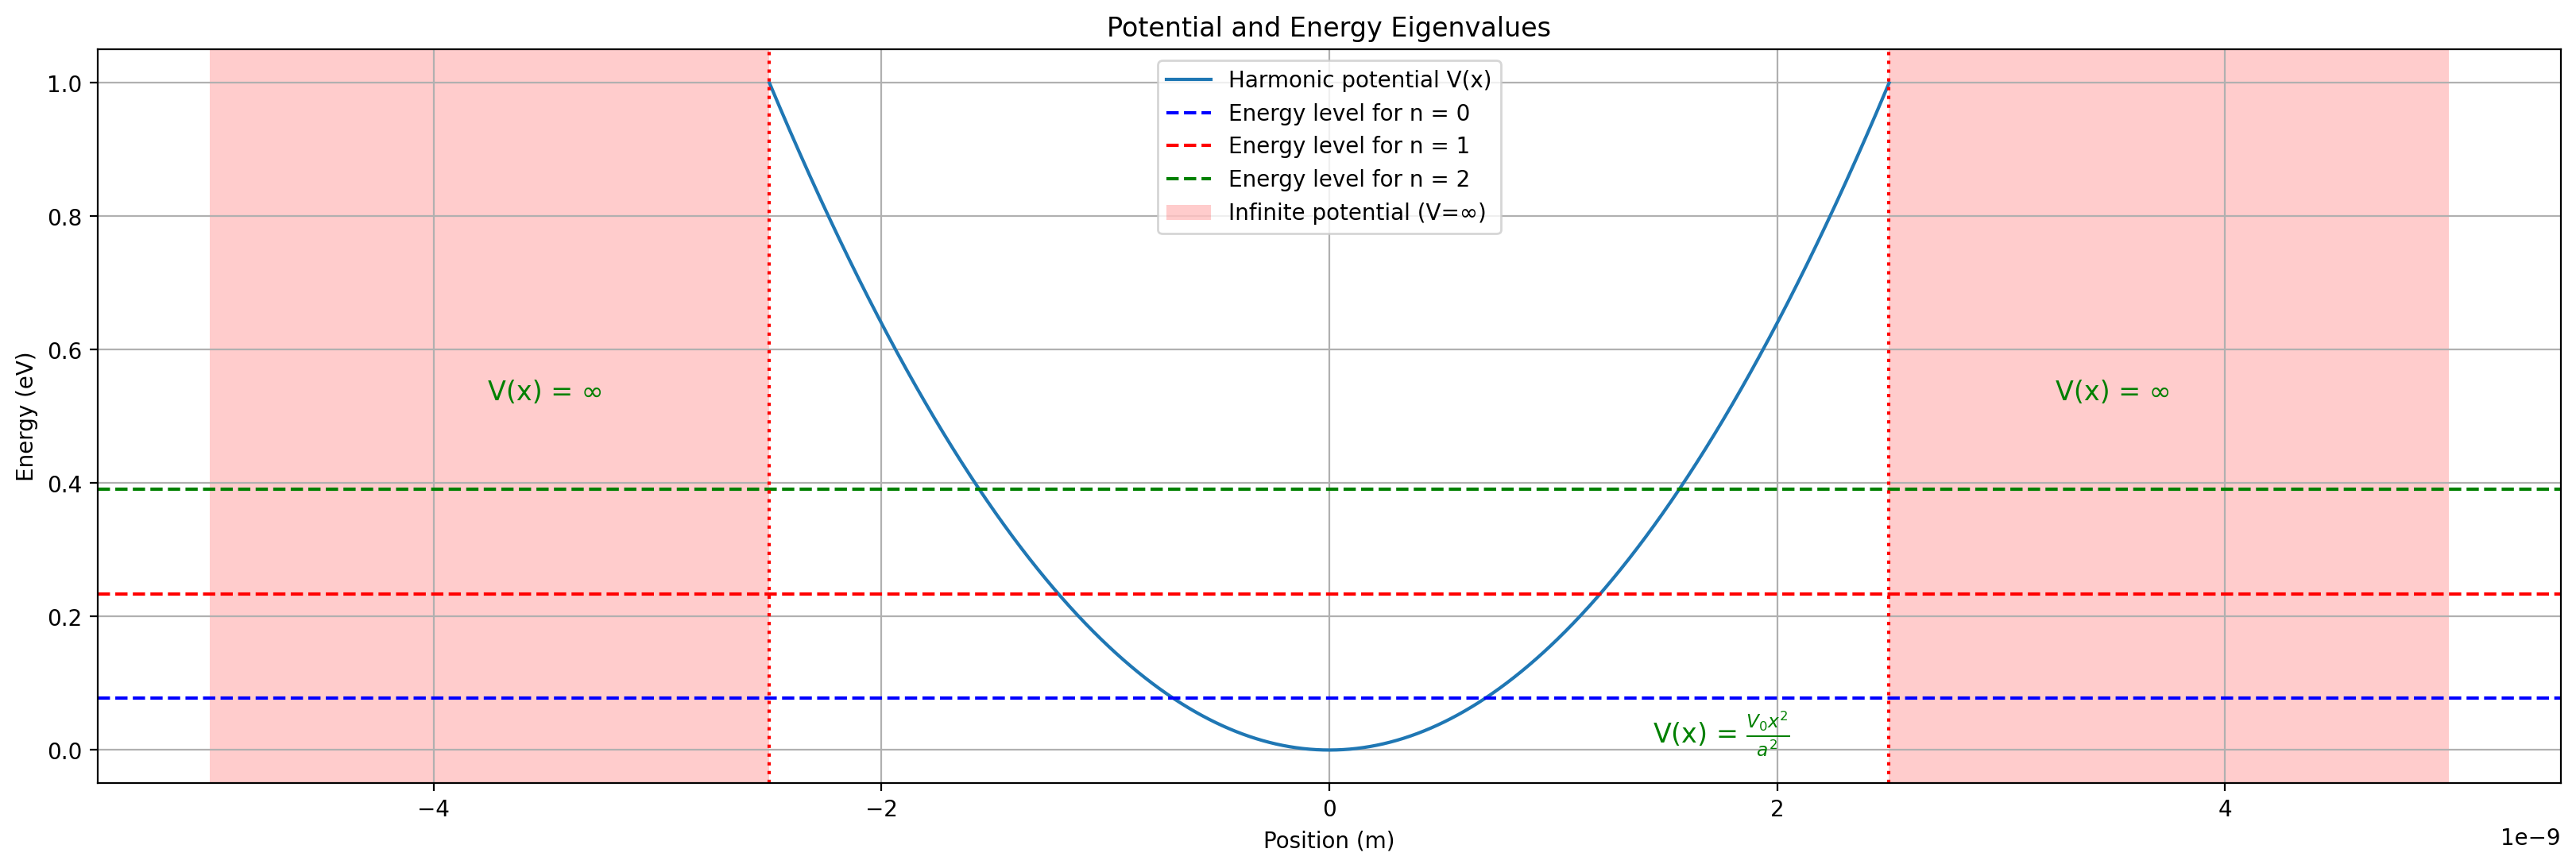

In [24]:
# Reset the global variable to e
v0 = e

# Graph 1: Normalized Analytical Wavefunctions for n=0,1,2
plt.figure(figsize=(20, 6))

for n in range(0, 3):
    plt.plot(x_points, h_psi(n), label=f'Analytical ψ(x) for n = {n}')
plt.axvline(-a, color='red', linestyle='dotted', linewidth=1.5)
plt.axvline(a, color='red', linestyle='dotted', linewidth=1.5)
plt.title('Normalized Wavefunction for the Harmonic Potential')
plt.xlabel('Position (m)')
plt.ylabel('Wavefunction ψ(x)')
plt.legend(loc='best')
plt.grid()
# Highlight the infinite potential regions
plt.axvspan(-2*a, -a, facecolor='red', alpha=0.2, label='Infinite potential (V=∞)')
plt.axvspan(a, 2*a, facecolor='red', alpha=0.2)
plt.text(-1.4*a, plt.ylim()[1]*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
plt.text(1.4*a, plt.ylim()[1]*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
plt.text(0.7*a, plt.ylim()[1]*0.01, r'V(x) = $\frac{V_0x^2}{a^2}$', ha='center', fontsize=12, color='green')
plt.show()

# Graph 2: Existing (Numerical) Wavefunction Solutions for n=1,2,3
plt.figure(figsize=(20, 6))

for n in range(0, 3):
    
    guess = harmonic_energy(n)
    
    state = energy(n, harmonic, guess, guess)
    
    psi = RK4(rhs_schrodinger, state, harmonic)
    plt.plot(x_points, norm_psi(psi), label=f'Numerical ψ(x) for n = {n}')
plt.axvline(-a, color='red', linestyle='dotted', linewidth=1.5)
plt.axvline(a, color='red', linestyle='dotted', linewidth=1.5)
plt.text(-1.4*a, plt.ylim()[1]*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
plt.text(1.4*a, plt.ylim()[1]*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
plt.text(0.7*a, plt.ylim()[1]*0.01, r'V(x) = $\frac{V_0x^2}{a^2}$', ha='center', fontsize=12, color='green')
plt.title('Existing Wavefunction for the Harmonic Potential')
plt.xlabel('Position (m)')
plt.ylabel('Wavefunction ψ(x)')
plt.legend(loc='best')
plt.grid()
plt.axvspan(-2*a, -a, facecolor='red', alpha=0.2)
plt.axvspan(a, 2*a, facecolor='red', alpha=0.2)
plt.show()

# Graph 3: Harmonic Potential and Energy Eigenvalues for n=1,2,3
plt.figure(figsize=(20, 6))
plt.plot(x_points, harmonic(x_points)/e, label='Harmonic potential V(x)')
colors = ['red', 'green', 'blue']

for n in range(0, 3):
    
    guess = harmonic_energy(n)
    
    state = energy(n, harmonic, guess, guess)
    plt.axhline(y=state/e, linestyle='--', color=colors[n-1], label=f'Energy level for n = {n}')
plt.axvline(-a, color='red', linestyle='dotted', linewidth=1.5)
plt.axvline(a, color='red', linestyle='dotted', linewidth=1.5)
plt.axvspan(-2*a, -a, facecolor='red', alpha=0.2, label='Infinite potential (V=∞)')
plt.axvspan(a, 2*a, facecolor='red', alpha=0.2)
plt.text(-1.4*a, plt.ylim()[1]*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
plt.text(1.4*a, plt.ylim()[1]*0.5, 'V(x) = ∞', ha='center', fontsize=12, color='green')
plt.text(0.7*a, plt.ylim()[1]*0.01, r'V(x) = $\frac{V_0x^2}{a^2}$', ha='center', fontsize=12, color='green')
plt.title('Potential and Energy Eigenvalues')
plt.xlabel('Position (m)')
plt.ylabel('Energy (eV)')
plt.legend(loc='best')
plt.grid()
plt.show()

#### Physical observations when $V_0 = e$

When ajusting the potential to $e$, the wavefunctions resemble the existing solutiosn of the pure harmonic oscillator. The ground state wavefucntion now exhibits a gaussian shape, while the low lying excited states have increased number of nodes as $n$ increases. At this potential the wavefunction oscillates naturally and matches better with the analytical solution. However, for $n=1,3$ the wavefunction is a reflection in the x-axis of its existing solution, this is due to the introduction of a sign change when computing the wavefucntion - as the initital condition of $\phi$ set to one.

Secondly, the computed eigenvalues are more suitable with the potential curve, causing them to be more physically significant. The normalisation of the wavefunction is also error-free when the potential is set to a lower value as the wavefunction becomes more well-behaved.


### II. Finite square well

In [25]:
# Reset v0 to 600e to be used in the new potential
v0 = 600*e

def finite(x):
    """
    Computes the potential energy, V(x), for a finite square well.
    
    Args:
        x (float or np.ndarray): The position coordinate(s)
    
    Returns:
        Vx (float or np.ndarray): The potential energy at x
    """
    # Use np.where to apply conditions elementwise
    Vx = np.where(np.abs(x) <= a/2, 0.0, v0)
    
    return Vx
    

In [26]:
# Finding three energy eigenvalues for the harmonic potential (n=1,2,3)
for i in range(1,3):
    
    guess = matrix(i,finite)
    
    harmonic_state = energy(i,finite,guess,guess)    
    
    print(f'For n = {i}:')
    print(f' . Estimated energy eigenvalue is: {harmonic_state / e : .7f} eV')
    print(f' . Known energy eigenvalue is:     {guess / e : .7f} eV')
    
    
    psi = RK4(rhs_schrodinger,harmonic_state , finite)
    
    print(f'For n = {i}:')
    print(f' . Estimated wavefunction is: {norm_psi(psi)[ : 4]} ')
    print(f' . Known wavefunction is:     {known_psi(i)[ : 4]} ')
    
    print('--------------------------------------------------')
    

For n = 1:
 . Estimated energy eigenvalue is:  0.0593842 eV
 . Known energy eigenvalue is:      0.0593367 eV
For n = 1:
 . Estimated wavefunction is: [0.00000000e+000 2.27363033e-126 4.77285722e-126 7.74563112e-126] 
 . Known wavefunction is:     [1.22464680e-12 3.14159136e+01 6.28317497e+01 9.42474308e+01] 
--------------------------------------------------


For n = 2:
 . Estimated energy eigenvalue is:  0.2375367 eV
 . Known energy eigenvalue is:      0.2373462 eV
For n = 2:
 . Estimated wavefunction is: [0.00000000e+000 2.43735108e-122 5.11647120e-122 8.30307862e-122] 
 . Known wavefunction is:     [-2.44929360e-12 -6.28317497e+01 -1.25662879e+02 -1.88492769e+02] 
--------------------------------------------------


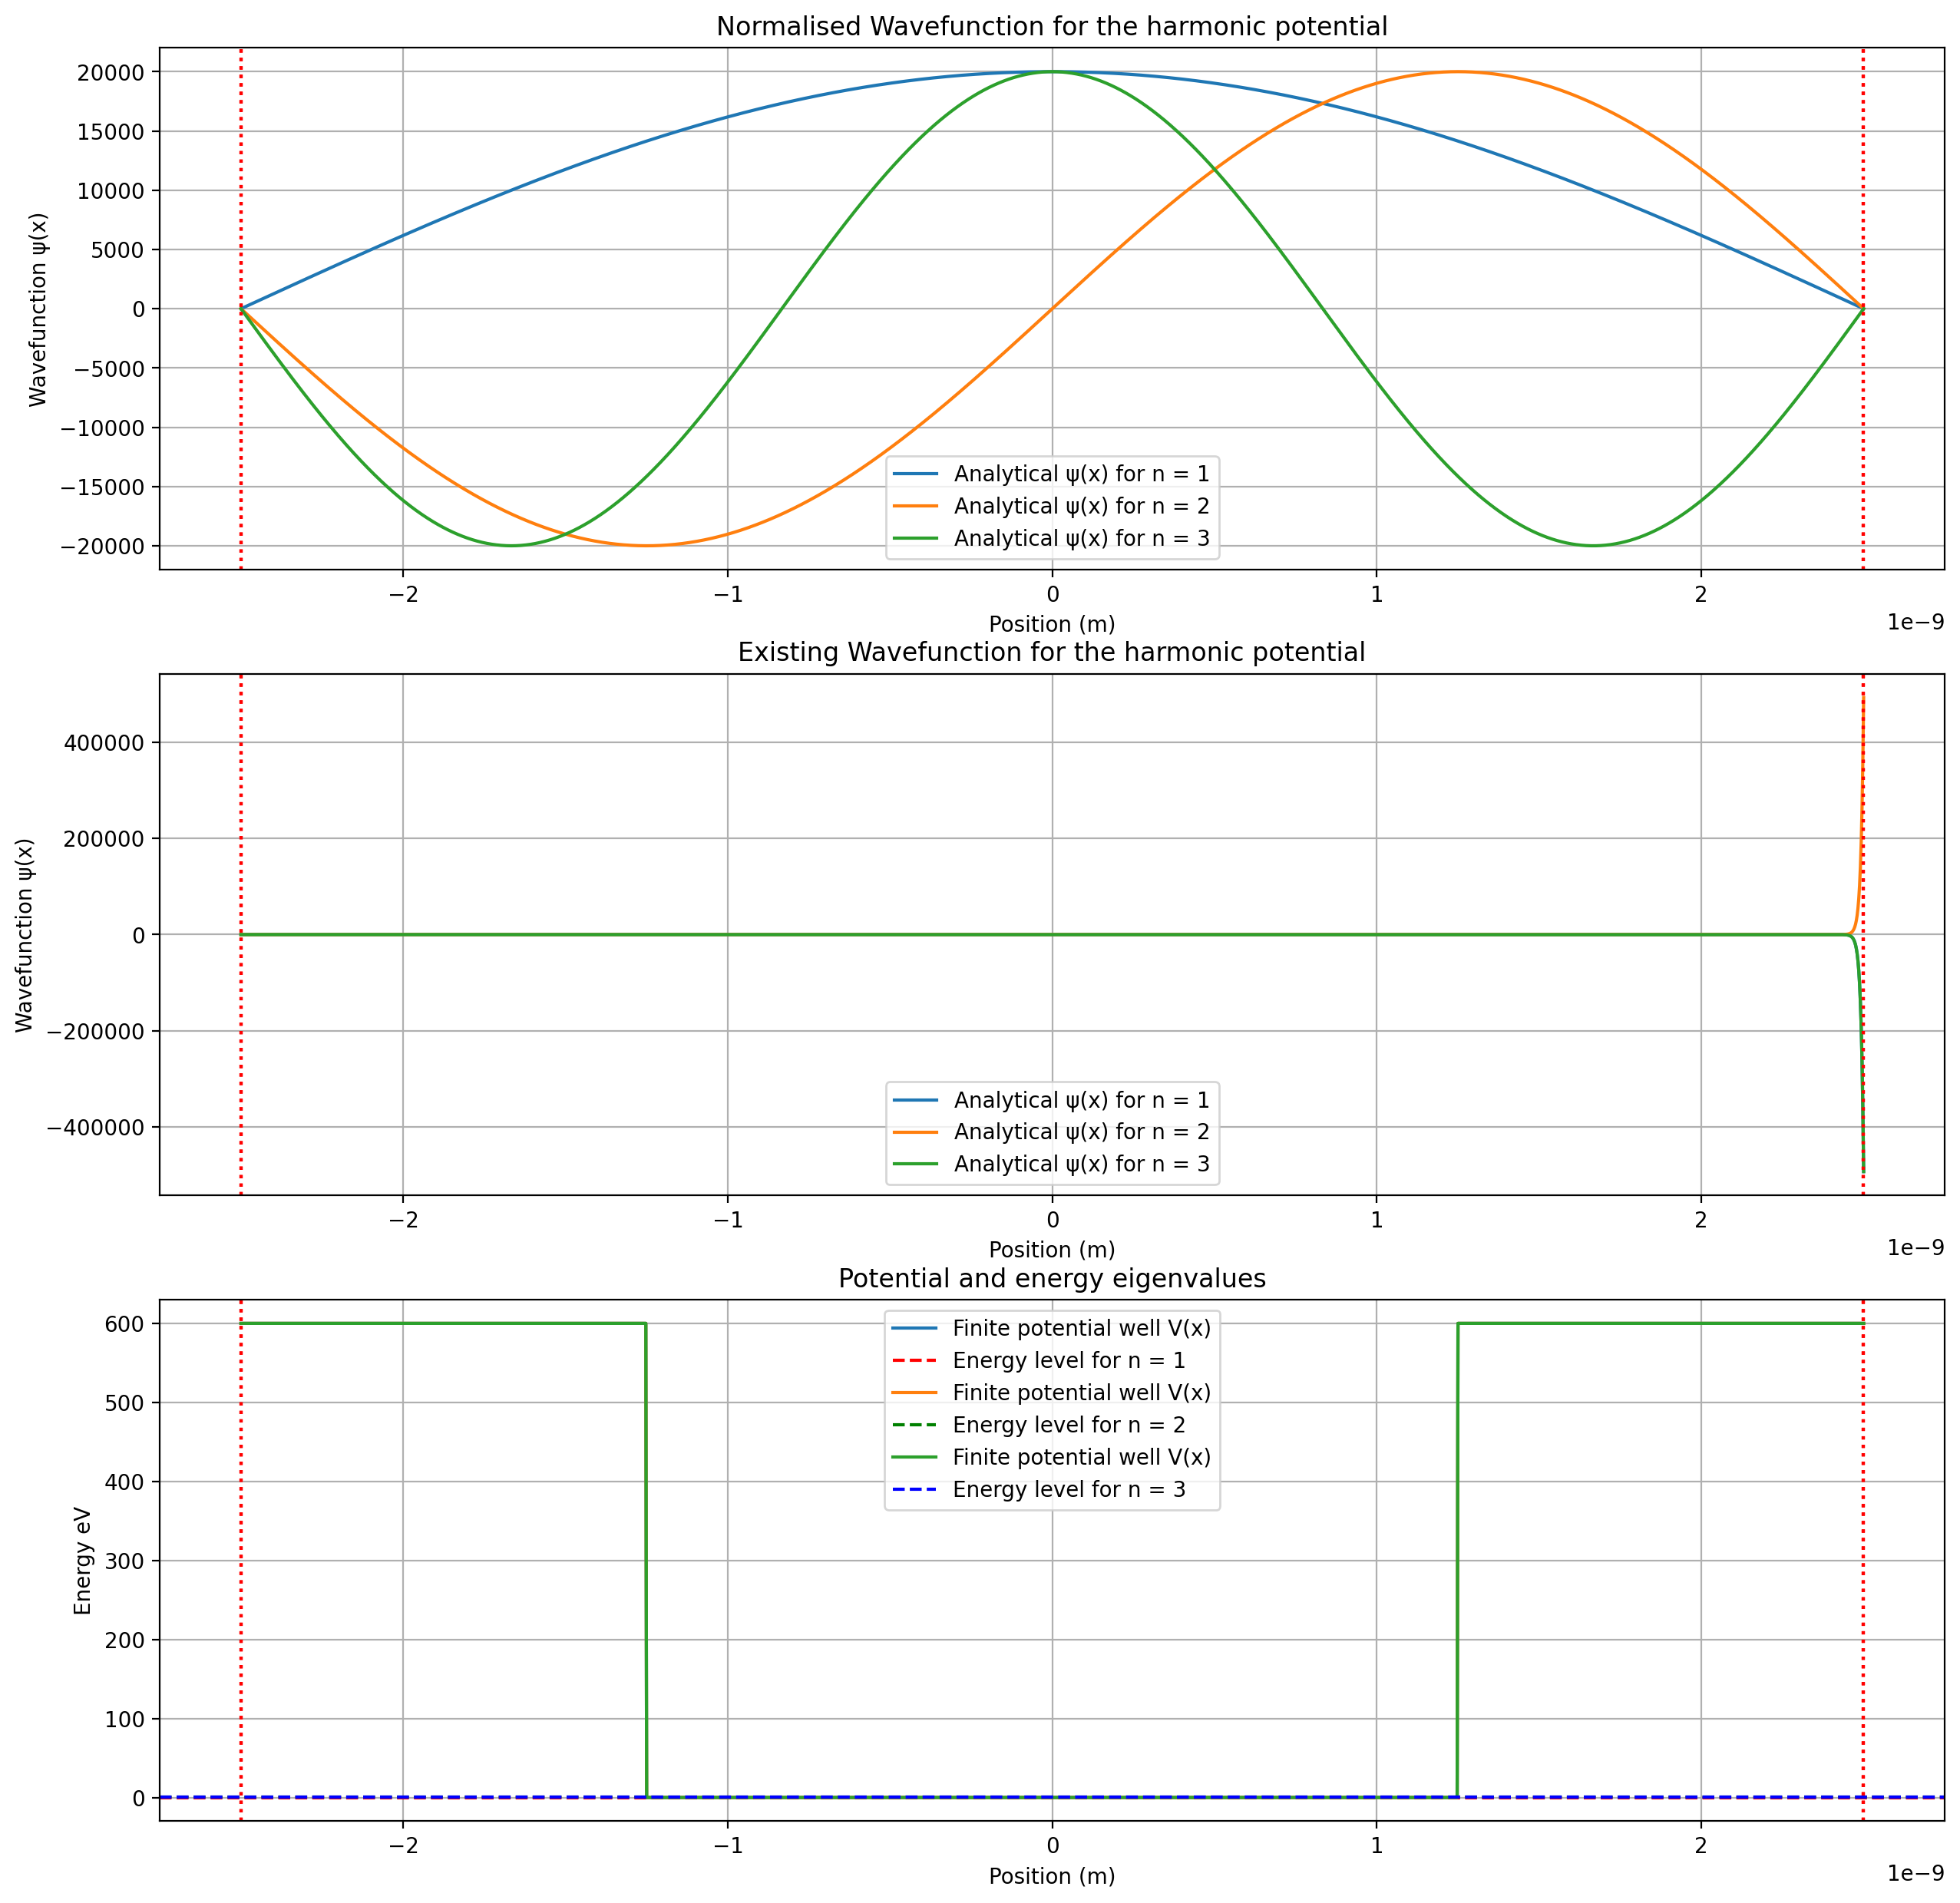

In [27]:
fig , ax = plt.subplots(3,1, figsize = (15,15))

for i in range(1,4):
    
    guess = matrix(i,finite)
    harmonic_state = energy(i,finite,guess,guess) 
    
    ax[0].plot(x_points, known_psi(i), label = f'Analytical ψ(x) for n = {i}')
    ax[0].set_title('Normalised Wavefunction for the harmonic potential')
    ax[0].axvline(-a,color = 'red', linestyle = 'dotted', linewidth = '1.5')
    ax[0].axvline(a,color  = 'red', linestyle = 'dotted', linewidth = '1.5')
    ax[0].set_xlabel('Position (m)')
    ax[0].set_ylabel('Wavefunction ψ(x)')
    ax[0].legend(loc = 'best')
    ax[0].grid()
    
    psi = RK4(rhs_schrodinger,harmonic_state, finite)
    
    ax[1].plot(x_points, norm_psi(psi), label = f'Analytical ψ(x) for n = {i}')
    ax[1].axvline(-a,color = 'red', linestyle = 'dotted', linewidth = '1.5')
    ax[1].axvline(a,color  = 'red', linestyle = 'dotted', linewidth = '1.5')
    ax[1].set_title('Existing Wavefunction for the harmonic potential')
    ax[1].set_xlabel('Position (m)')
    ax[1].set_ylabel('Wavefunction ψ(x)')
    ax[1].legend(loc= 'best')
    ax[1].grid()
    
    
    
    # Eigenvalue from n=0 to 2    
    colors = ['red', 'green', 'blue',] 
    ax[2].plot(x_points, finite(x_points)/e, label = 'Finite potential well V(x)')
    ax[2].axhline(y = harmonic_state/e , linestyle ='--', label = f'Energy level for n = {i}' ,color = colors[i-1])
    ax[2].axvline(-a,color = 'red', linestyle = 'dotted', linewidth = '1.5')
    ax[2].axvline(a,color  = 'red', linestyle = 'dotted', linewidth = '1.5')
    ax[2].set_xlabel('Position (m)')
    ax[2].set_ylabel('Energy eV')
    ax[2].set_title('Potential and energy eigenvalues')
    ax[2].legend(loc='best')
    ax[2].grid()



    

In [28]:
# Reset v0 to e
v0 = e

for i in range(1,4):
    
    guess = matrix(i,finite)
    
    harmonic_state = energy(i,finite,guess,guess)    
    
    print(f'For n = {i}:')
    print(f' . Estimated energy eigenvalue is: {harmonic_state / e : .7f} eV')
    print(f' . Known energy eigenvalue is:     {guess / e : .7f} eV')
    
    
    psi = RK4(rhs_schrodinger,harmonic_state , finite)
    
    print(f'For n = {i}:')
    print(f' . Estimated wavefunction is: {norm_psi(psi)[ : 4]} ')
    print(f' . Known wavefunction is:     {known_psi(i)[ : 4]} ')
    
    print('--------------------------------------------------')

For n = 1:
 . Estimated energy eigenvalue is:  0.0449047 eV
 . Known energy eigenvalue is:      0.0448786 eV
For n = 1:
 . Estimated wavefunction is: [0.         0.26722562 0.53449311 0.80184434] 
 . Known wavefunction is:     [1.22464680e-12 3.14159136e+01 6.28317497e+01 9.42474308e+01] 
--------------------------------------------------


For n = 2:
 . Estimated energy eigenvalue is:  0.1784245 eV
 . Known energy eigenvalue is:      0.1783218 eV
For n = 2:
 . Estimated wavefunction is: [0.         0.773575   1.54725427 2.32114206] 
 . Known wavefunction is:     [-2.44929360e-12 -6.28317497e+01 -1.25662879e+02 -1.88492769e+02] 
--------------------------------------------------


For n = 3:
 . Estimated energy eigenvalue is:  0.3961984 eV
 . Known energy eigenvalue is:      0.3959750 eV
For n = 3:
 . Estimated wavefunction is: [0.         2.23498872 4.47019881 6.70585168] 
 . Known wavefunction is:     [-3.67394040e-12 -9.42474308e+01 -1.88492769e+02 -2.82733921e+02] 
--------------------------------------------------


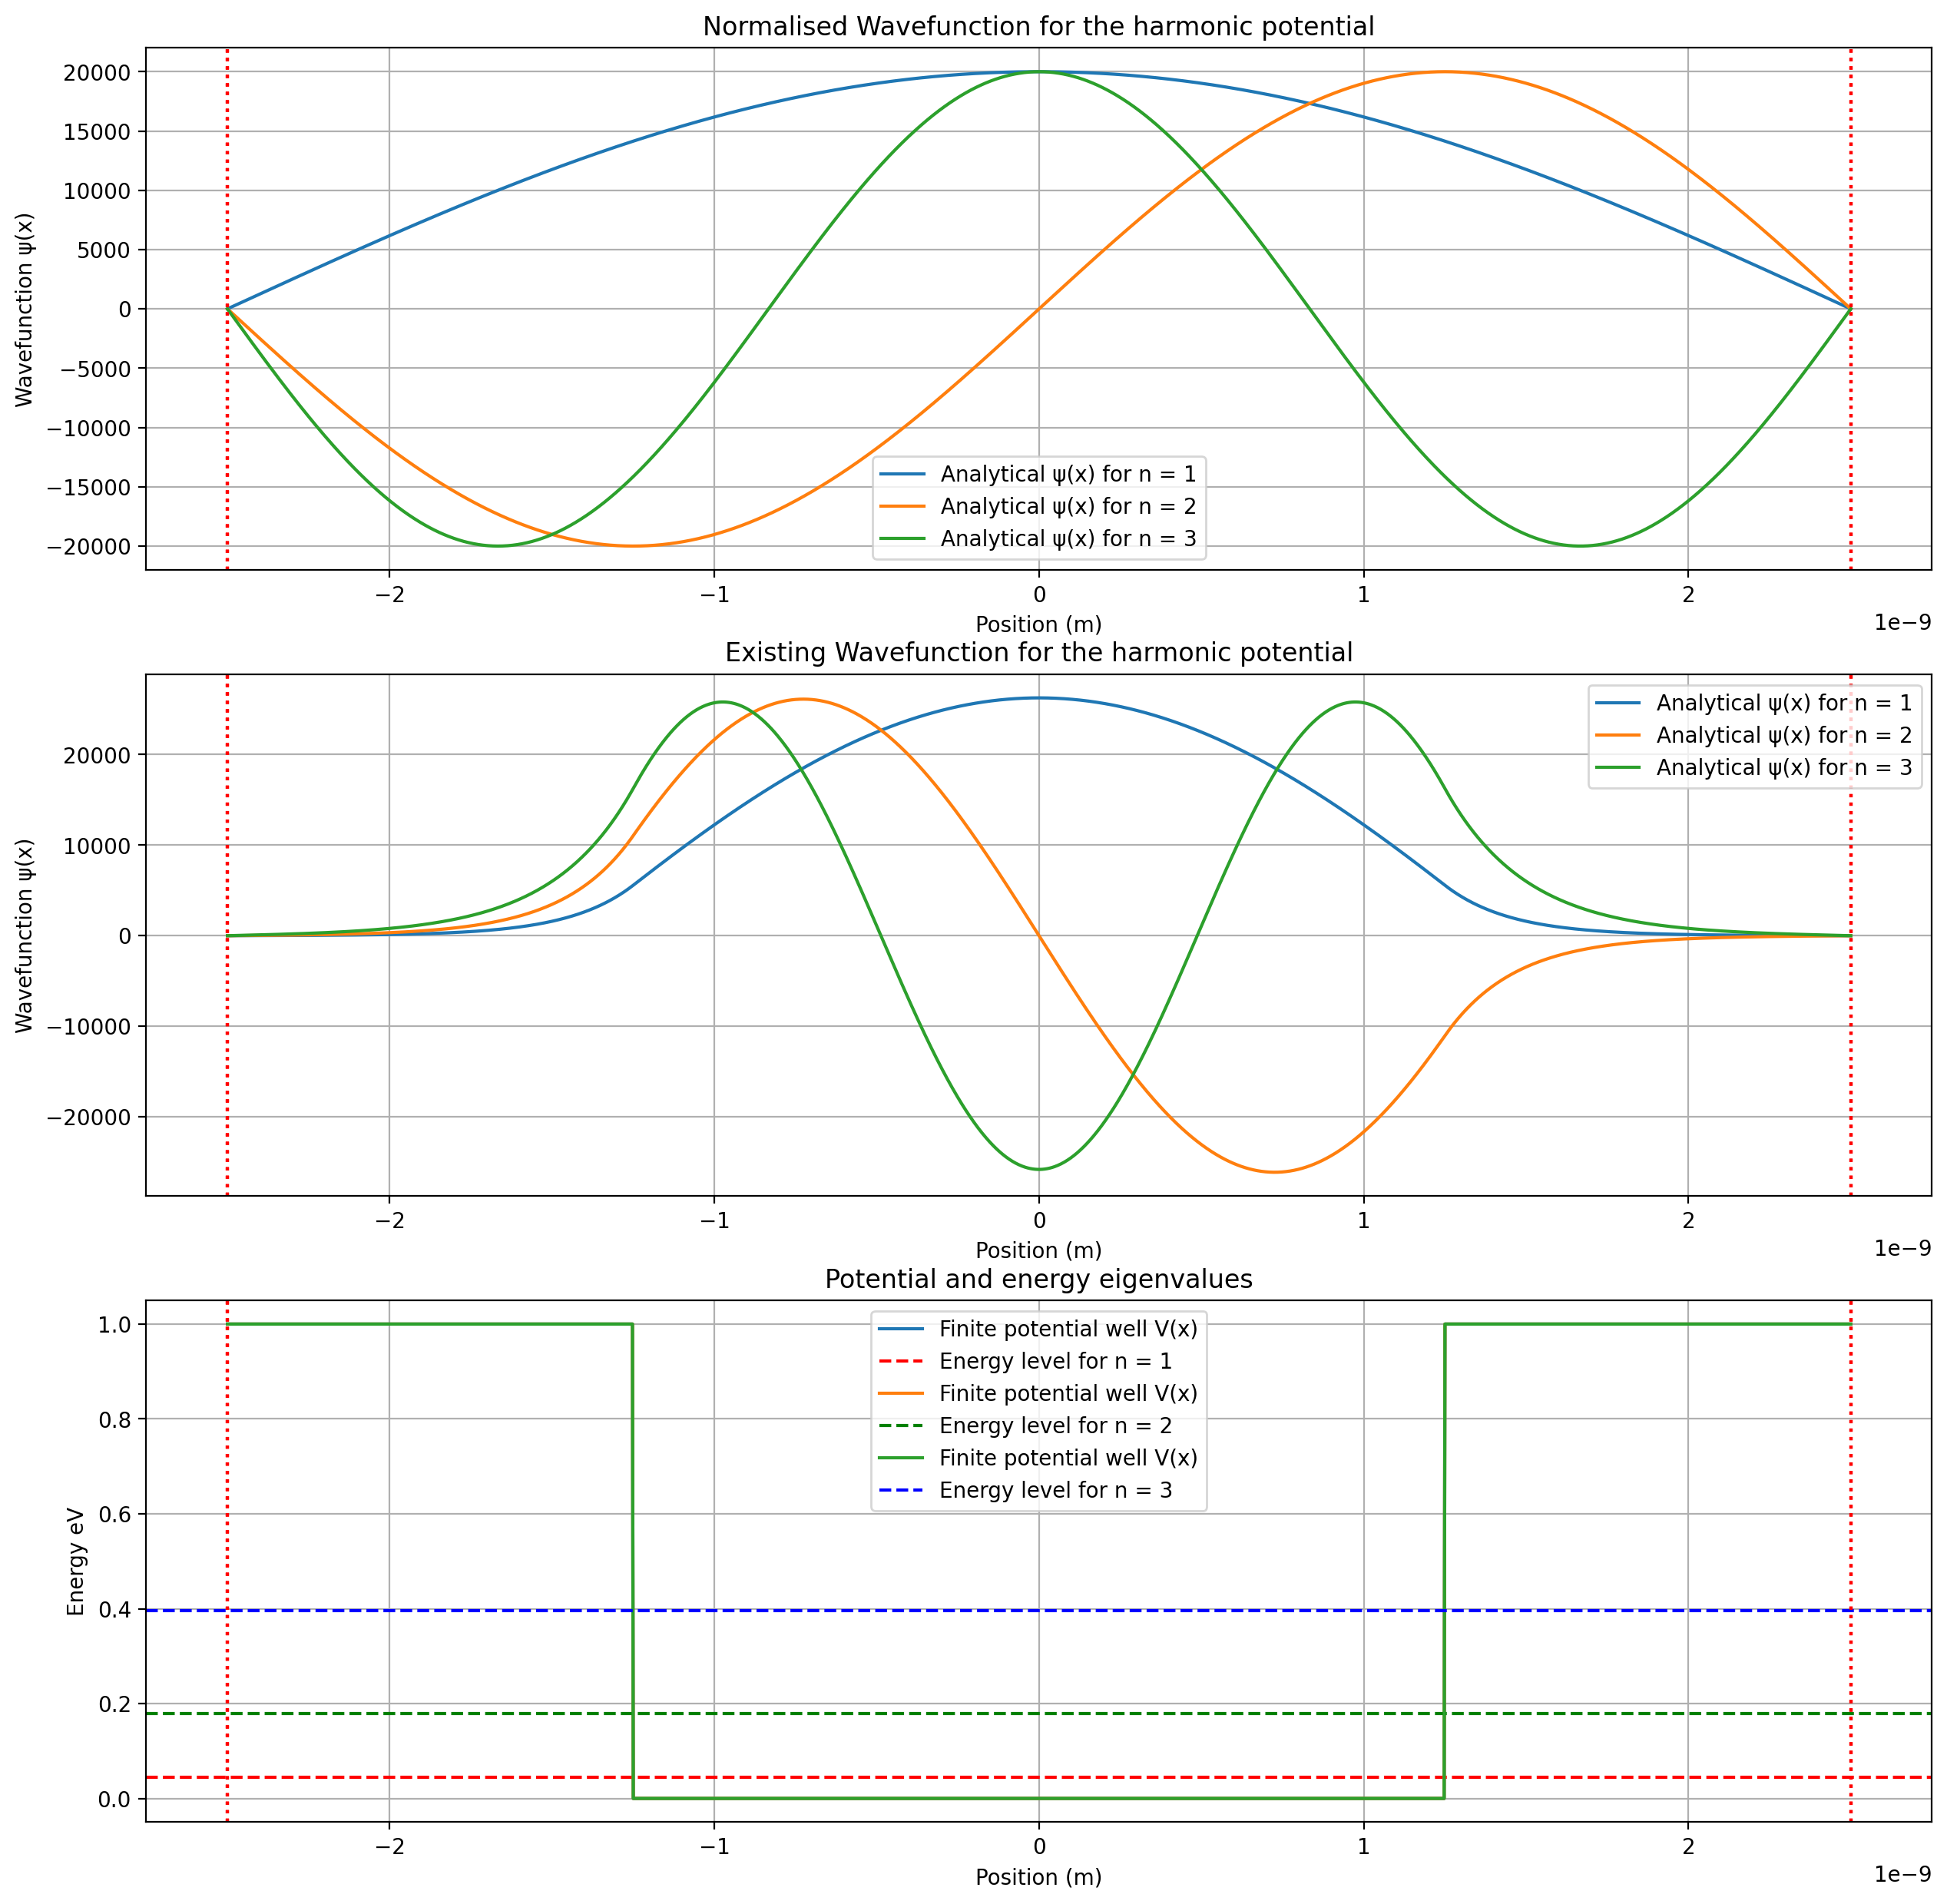

In [29]:
fig , ax = plt.subplots(3,1, figsize = (15,15))

for i in range(1,4):
    
    guess = matrix(i,finite)
    harmonic_state = energy(i,finite,guess,guess) 
    
    ax[0].plot(x_points, known_psi(i), label = f'Analytical ψ(x) for n = {i}')
    ax[0].set_title('Normalised Wavefunction for the harmonic potential')
    ax[0].axvline(-a,color = 'red', linestyle = 'dotted', linewidth = '1.5')
    ax[0].axvline(a,color  = 'red', linestyle = 'dotted', linewidth = '1.5')
    ax[0].set_xlabel('Position (m)')
    ax[0].set_ylabel('Wavefunction ψ(x)')
    ax[0].legend(loc = 'best')
    ax[0].grid()
    
    psi = RK4(rhs_schrodinger,harmonic_state, finite)
    
    ax[1].plot(x_points, norm_psi(psi), label = f'Analytical ψ(x) for n = {i}')
    ax[1].axvline(-a,color = 'red', linestyle = 'dotted', linewidth = '1.5')
    ax[1].axvline(a,color  = 'red', linestyle = 'dotted', linewidth = '1.5')
    ax[1].set_title('Existing Wavefunction for the harmonic potential')
    ax[1].set_xlabel('Position (m)')
    ax[1].set_ylabel('Wavefunction ψ(x)')
    ax[1].legend(loc= 'best')
    ax[1].grid()
    
    
    
    # Eigenvalue from n=0 to 2    
    colors = ['red', 'green', 'blue',] 
    ax[2].plot(x_points, finite(x_points)/e, label = 'Finite potential well V(x)')
    ax[2].axhline(y = harmonic_state/e , linestyle ='--', label = f'Energy level for n = {i}' ,color = colors[i-1])
    ax[2].axvline(-a,color = 'red', linestyle = 'dotted', linewidth = '1.5')
    ax[2].axvline(a,color  = 'red', linestyle = 'dotted', linewidth = '1.5')
    ax[2].set_xlabel('Position (m)')
    ax[2].set_ylabel('Energy eV')
    ax[2].set_title('Potential and energy eigenvalues')
    ax[2].legend(loc='best')
    ax[2].grid()





## Bibliography
- Ramalingam, G. Kathirgamanathan, P. Ravi, G. Elangovan, T. Arjun kumar, B. Manivannan, N. Kaviyarasu, K. 2020. "Quantum Confinement". \[Online\] Brunel University Research Archive. Available from: https://bura.brunel.ac.uk/bitstream/2438/20190/1/FullText.pdf [Accessed 15th March 2025]

- Schroeder, D.V. 2025. "The Schrödinger Equations". \[Online\] Weber State University. Available from: https://physics.weber.edu/schroeder/quantum/Schrodinger.pdf \[Accessed 16th March 2025\]

- Dash, L. 2020. " PHAS0029 Final Assignment 2020". \[Online\] UCL Moodle resource. Available from:  https://moodle.ucl.ac.uk/course/view.php?id=6766&section=14 \[accessed 6th February 2020\]

- Rae, Alastair I. M. 2002. _"Quantum mechanics"_. Fourth edition. Bristol: Institute of Physics publishing. 